In [1]:
# Importing Numpy and Pandas library

import numpy as np
import pandas as pd

# importing json to read json file

import json

# Importing seaborn and matplotlib library for Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

# Importing stats and chi2_contingency for statistical computation
from scipy import stats
from scipy.stats import chi2_contingency

**Importing 'demographics.txt', 'behaviour.JSON', 'campaign.JSON' into python**

In [2]:
# Importing 'demographics.txt' data set for the case study

demography = pd.read_csv('D:\Python\Retail Sales\demographics.txt', sep="\t")

# Importing 'behaviour.JSON' data set for the case study

# Define the file path
file_path_behaviour = 'D:/Python/Retail Sales/behaviour.JSON'
file_path_campaign = 'D:/Python/Retail Sales/campaign.JSON'

# Open and read the behaviour.JSON file
with open(file_path_behaviour, 'r', encoding='utf-8') as file:
    behaviour_json = json.load(file)

# Normalize JSON data to a DataFrame
# Since the JSON data has keys for each ID, we need to flatten it correctly
data = []
for entry in behaviour_json:
    for key, value in entry.items():
        value['ID'] = key
        data.append(value)

behaviour = pd.DataFrame(data)

# Importing 'campaign.JSON' data set for the case study

# Define the file path
file_path_campaign = 'D:/Python/Retail Sales/campaign.JSON'

# Open and read the campaign.JSON file
with open(file_path_campaign, 'r', encoding='utf-8') as file:
    campaign_json = json.load(file)

# Normalize JSON data to a DataFrame
# Since the JSON data has keys for each ID, we need to flatten it correctly
data = []
for entry in campaign_json:
    for key, value in entry.items():
        value['ID'] = key
        data.append(value)

campaign = pd.DataFrame(data)

In [4]:
# Checking the shape of each file

print("Shape of Demography:", demography.shape)
print("Shape of Behaviour:", behaviour.shape)
print("Shape of Campaign:", campaign.shape)

Shape of Demography: (2240, 9)
Shape of Behaviour: (2240, 13)
Shape of Campaign: (2240, 8)


# Data Quality and Check (Task 1)
**1. Creating a consolidated view of data by joining the data present in Demography, behaviour, campaign**

In [5]:
# Converting IDs in behaviour and campaign to match demography IDs
behaviour['ID'] = behaviour['ID'].apply(lambda x: int(x.split('_')[1]))
campaign['ID'] = campaign['ID'].apply(lambda x: int(x.split('_')[1]))

# Merging the DataFrames

sale = demography.merge(behaviour, on='ID').merge(campaign, on='ID')

sale.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer Country  Recency  ...  NumCatalogPurchases  \
0         0     6/16/14      SP        0  ...                    4   
1         0     6/15/14      CA        0  ...                    3   
2         1     5/13/14      US        0  ...                    2   
3         1     5/11/14     AUS        0  ...                    0   
4         0      4/8/14      SP        0  ...                    1   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                  6                  1             0             0   
1                  7                  5             0             1   
2                  5                  2             0             0   
3                  2                  7             0             0   
4                  2                  7             0             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  Complain  
0             0             0             0         1         0  
1             0             0             0         1         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             1             0             0         1         0  

[5 rows x 28 columns]

**2. Are there any variables where you will need to clean the raw data, what kind of cleaning will be needed?**

In [6]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Country              2240 non-null   object
 9   Recency              2240 non-null   int64 
 10  MntWines             2240 non-null   int64 
 11  MntFruits            2240 non-null   int64 
 12  MntMeatProducts      2240 non-null   int64 
 13  MntFishProducts      2240 non-null   int64 
 14  MntSweetProducts     2240 non-null   int64 
 15  MntGoldProds         2240 non-null   int64 
 16  NumDea

**Observation & further steps:**

-  Need to clean the extra space from the column names.
-  Convert 'Income' datatype to numeric.
-  Convert 'Dt_Customer' datatype to datetime.
-  Check for missing value and replace with appropriate data.
-  Check for data inconsistancies of the categorical value.
-  Check for null values in the data set.

In [7]:
# Cleaning extra spaces from the column names.

sale.columns = sale.columns.str.strip()

# Converting 'Income' into numeric
sale['Income'] = sale['Income'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Dt_Customer' to datetime
sale['Dt_Customer'] = pd.to_datetime(sale['Dt_Customer'], format='%m/%d/%y')

In [8]:
# Identifying the missing values

missing_values = sale.isnull().sum()

# Handling the missing value in Income with mean

# 1. Calculate the mean of the 'Income' column
mean_income = sale['Income'].mean()
print(f"Mean of Income: {mean_income}")

# 2. Filling missing values in the 'Income' column with the mean
sale['Income'] = sale['Income'].fillna(mean_income)

# Displaying missing values after filling
print("Missing values after filling:\n", sale.isnull().sum())

Mean of Income: 52247.25135379061
Missing values after filling:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
Complain               0
dtype: int64


In [10]:
# Checking for inconsistencies in categorical variables

categorical_vars = [
    'Education', 'Marital_Status', 'Country',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Response', 'Complain'
]

categorical_inconsistencies = {}
for var in categorical_vars:
    categorical_inconsistencies[var] = sale[var].unique()

# Summary of Data Validation
validation_summary = {
    #'Data Types': data_types,
    #'Missing Values (%)': missing_values,
    'Categorical Inconsistencies': categorical_inconsistencies,
    #'Outliers': outliers
}

# Displaying the validation summary
for key, value in validation_summary.items():
    print(f"---- {key} ----")
    print(value)
    print("\n")

---- Categorical Inconsistencies ----
{'Education': array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object), 'Marital_Status': array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object), 'Country': array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object), 'AcceptedCmp1': array([0, 1], dtype=int64), 'AcceptedCmp2': array([0, 1], dtype=int64), 'AcceptedCmp3': array([0, 1], dtype=int64), 'AcceptedCmp4': array([0, 1], dtype=int64), 'AcceptedCmp5': array([0, 1], dtype=int64), 'Response': array([1, 0], dtype=int64), 'Complain': array([0, 1], dtype=int64)}




In [11]:
# Check for null values in the data set.

# Check for null values
null_values = sale.isnull().sum()

print(null_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
Complain               0
dtype: int64


**3. Create a data quality report after doing the necessary cleaning and joining of the files by:<br>
<br>
(a) Doing univariates for continuous variables (compute: percentage of missing values, percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)**

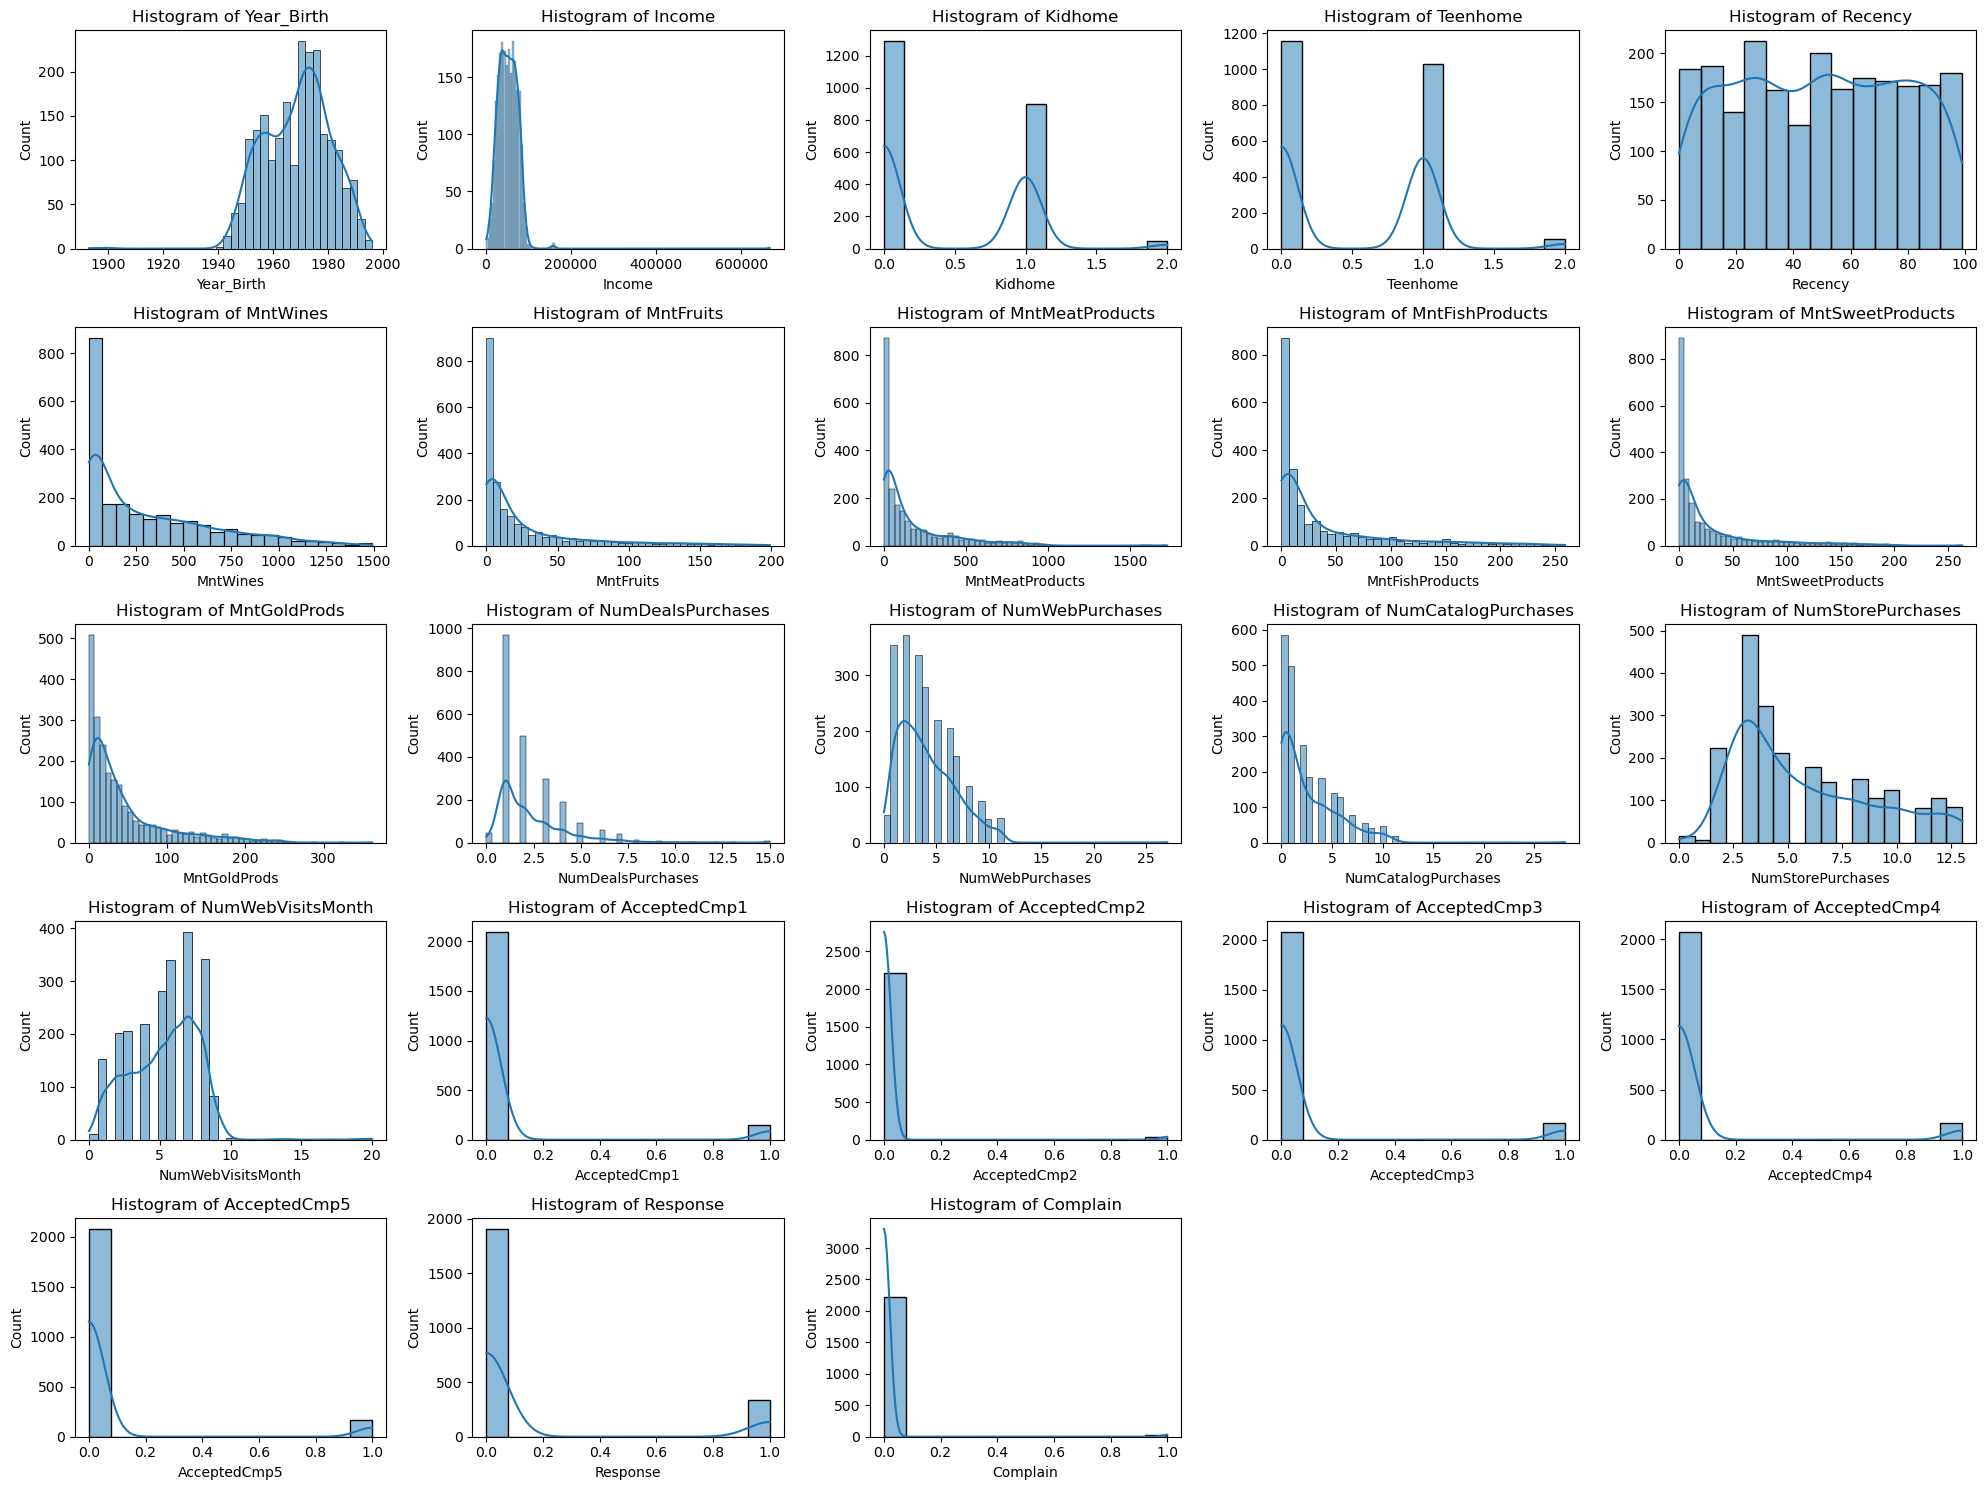

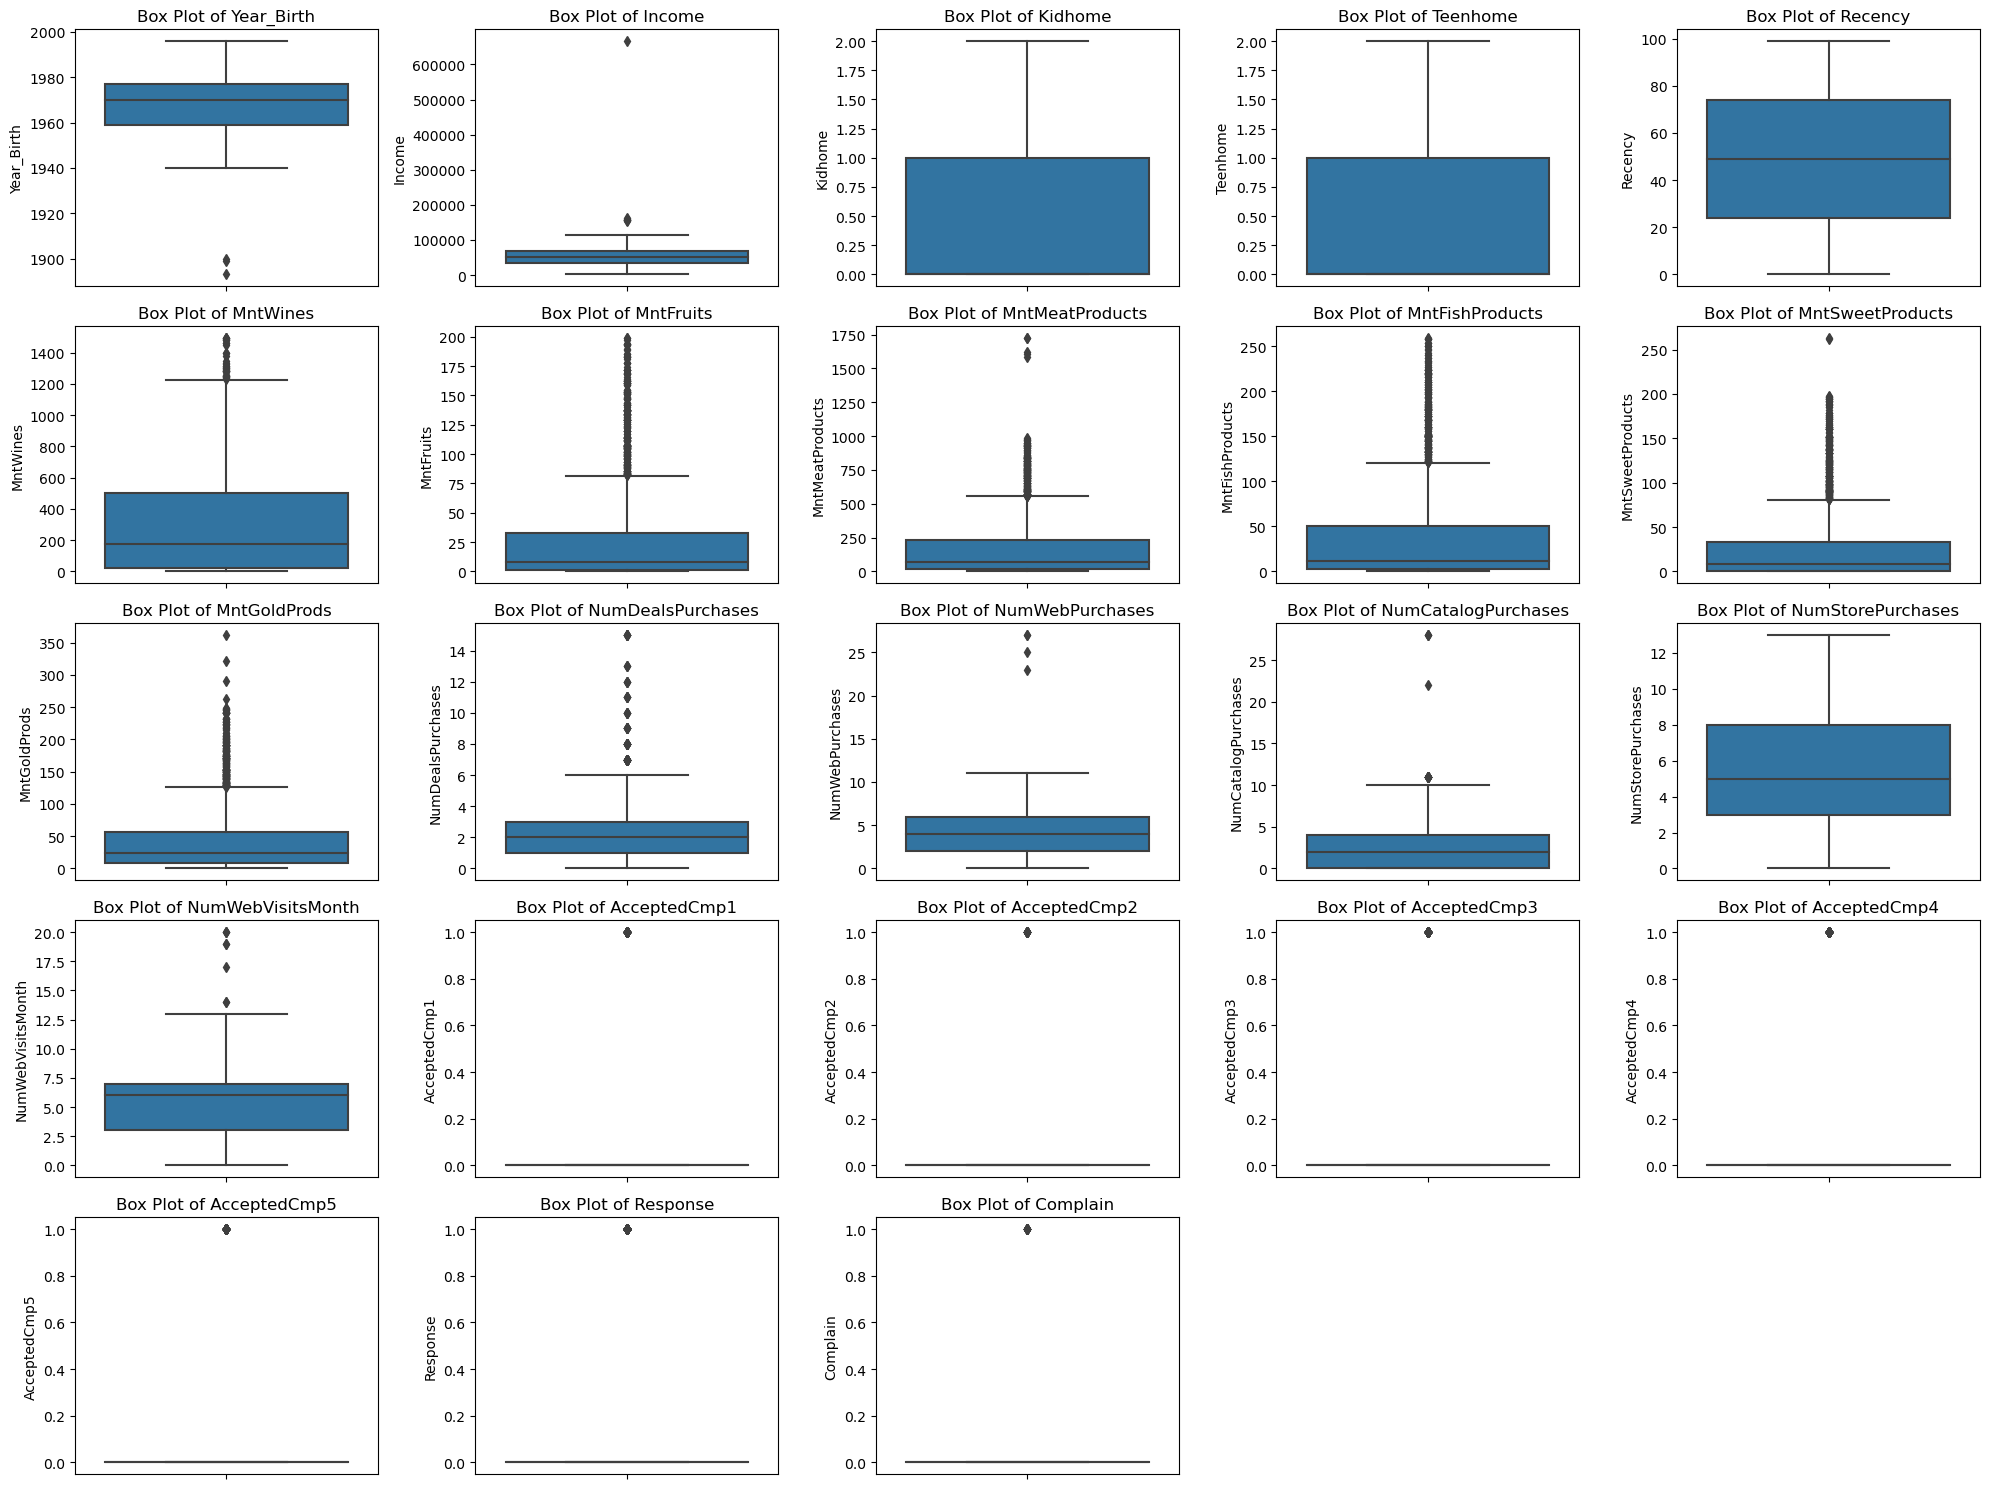

                     Missing Values (%)  Zero Values (%)          Mean  \
Year_Birth                          0.0         0.000000   1968.805804   
Income                              0.0         0.000000  52247.251354   
Kidhome                             0.0        57.723214      0.444196   
Teenhome                            0.0        51.696429      0.506250   
Recency                             0.0         1.250000     49.109375   
MntWines                            0.0         0.580357    303.935714   
MntFruits                           0.0        17.857143     26.302232   
MntMeatProducts                     0.0         0.044643    166.950000   
MntFishProducts                     0.0        17.142857     37.525446   
MntSweetProducts                    0.0        18.705357     27.062946   
MntGoldProds                        0.0         2.723214     44.021875   
NumDealsPurchases                   0.0         2.053571      2.325000   
NumWebPurchases                     0.

In [12]:
# Univariate Analysis for Continuous Variables
continuous_vars = sale.select_dtypes(include=[np.number]).columns.tolist()
continuous_vars.remove('ID')  # Exclude the 'ID' variable.

# Plot histograms for numerical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars):
    plt.subplot(5, 5, i + 1)
    sns.histplot(sale[var], kde=True)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

# Box plots for continuous variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=sale[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

# Initializing an empty dictionary to store results
data_quality_report = {}

# Calculating statistics for each continuous variable
for var in continuous_vars:
    data_quality_report[var] = {
        'Missing Values (%)': sale[var].isnull().mean() * 100,
        'Zero Values (%)': (sale[var] == 0).mean() * 100,
        'Mean': sale[var].mean(),
        '25th Percentile': sale[var].quantile(0.25),
        '50th Percentile (Median)': sale[var].median(),
        '75th Percentile': sale[var].quantile(0.75),
        '90th Percentile': sale[var].quantile(0.90),
        '95th Percentile': sale[var].quantile(0.95),
        'Min': sale[var].min(),
        'Max': sale[var].max()
    }

# Converting the dictionary to a DataFrame
data_quality_report_df = pd.DataFrame(data_quality_report).transpose()

# Displaying the data quality report
print(data_quality_report_df)

**3. Create a data quality report after doing the necessary cleaning and joining of the files by:<br>
(b) Doing univariates for categorical variables (compute:percentage of missing values, number of unique values)**

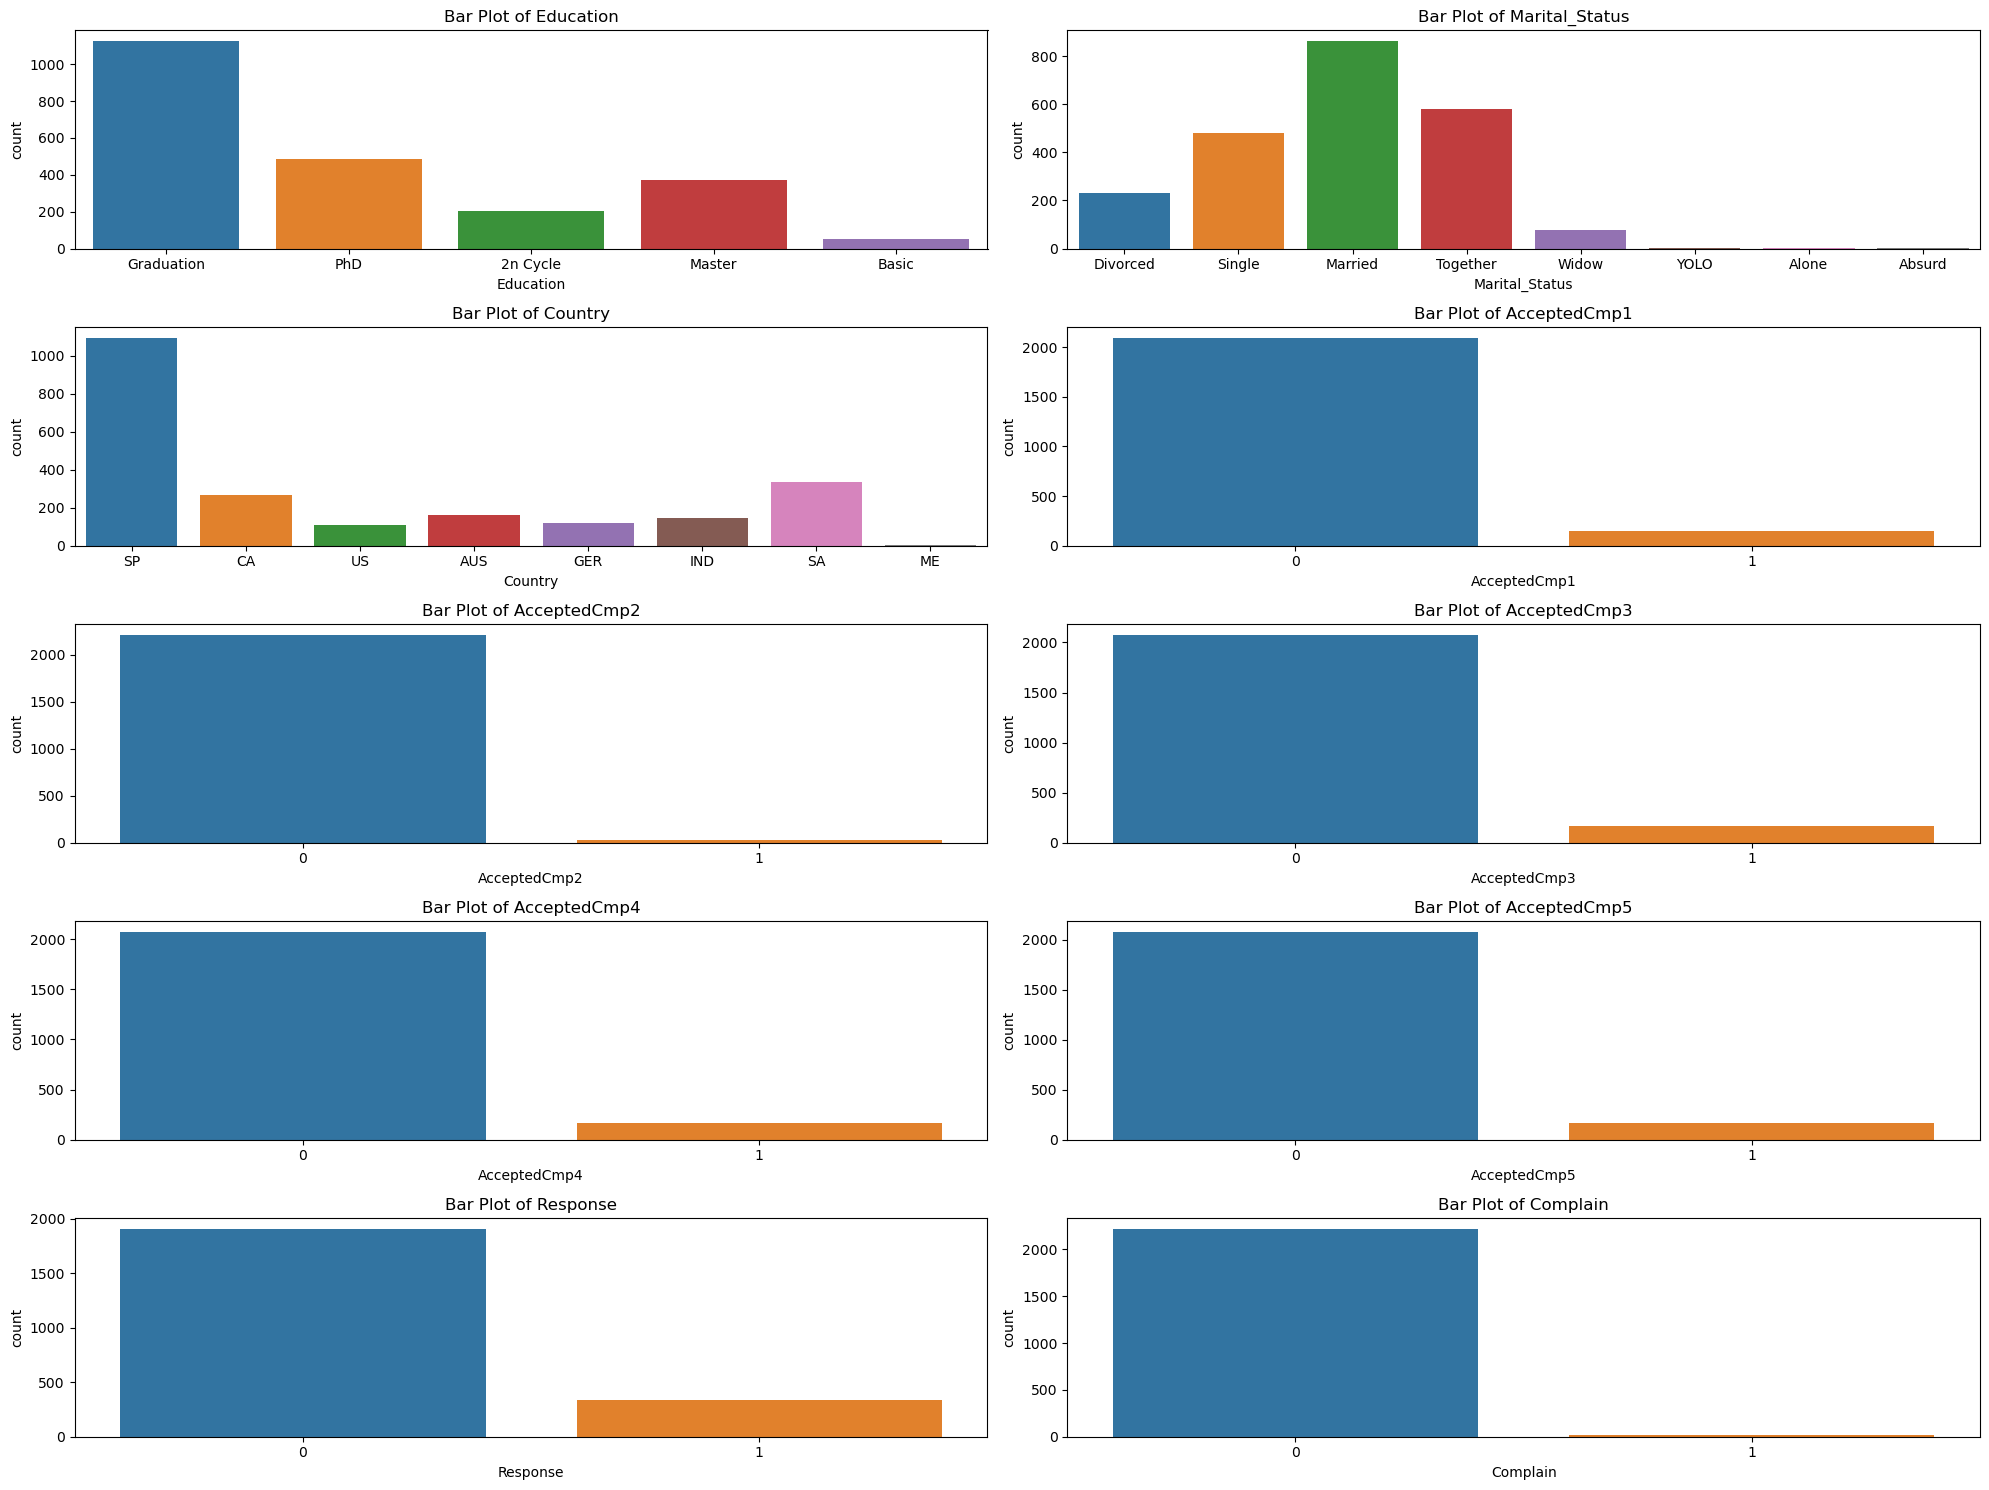

                Missing Values (%)  Unique Values
Education                      0.0            5.0
Marital_Status                 0.0            8.0
Country                        0.0            8.0
AcceptedCmp1                   0.0            2.0
AcceptedCmp2                   0.0            2.0
AcceptedCmp3                   0.0            2.0
AcceptedCmp4                   0.0            2.0
AcceptedCmp5                   0.0            2.0
Response                       0.0            2.0
Complain                       0.0            2.0


In [13]:
# Univariate Analysis for Categorical Variables

# Creating list of categorical variables
categorical_vars = [
    'Education', 'Marital_Status', 'Country',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Response', 'Complain'
]

# Plotting bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_vars):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=sale[var])
    plt.title(f'Bar Plot of {var}')

plt.tight_layout()
plt.show()

# Initializing an empty dictionary to store results
data_quality_report_categorical = {}

# Calculating statistics for each categorical variable
for var in categorical_vars:
    data_quality_report_categorical[var] = {
        'Missing Values (%)': sale[var].isnull().mean() * 100,
        'Unique Values': sale[var].nunique()
    }

# Converting the dictionary to a DataFrame
data_quality_report_categorical_df = pd.DataFrame(data_quality_report_categorical).transpose()

# Displaying the data quality report for categorical variables
print(data_quality_report_categorical_df)

**4. Are there any extreme values of variables representing income, amount of money spent on various categories, recency of purchase?**

In [14]:
# Creating a list of variables to check for extreme values

variables_of_interest = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Function to identify outliers using IQR method
def find_outliers(sale, column):
    if column not in sale.columns:
        return None

    Q1 = sale[column].quantile(0.25)
    Q3 = sale[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sale[(sale[column] < lower_bound) | (sale[column] > upper_bound)]
    return outliers

# Identifying and printing outliers for each variable of interest
for var in variables_of_interest:
    outliers = find_outliers(sale, var)
    if outliers is not None:
        #print(f"Outliers for {var}:")
        #print(outliers)
        print(f"Number of outliers in {var}: {len(outliers)}")
    else:
        print(f"Column {var} does not exist in the DataFrame.")
    print()

Number of outliers in Income: 8

Number of outliers in Recency: 0

Number of outliers in MntWines: 35

Number of outliers in MntFruits: 227

Number of outliers in MntMeatProducts: 175

Number of outliers in MntFishProducts: 223

Number of outliers in MntSweetProducts: 248

Number of outliers in MntGoldProds: 207



In [16]:
sale_1 = sale.copy()
sale_1.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer Country  Recency  ...  NumCatalogPurchases  NumStorePurchases  \
0  2014-06-16      SP        0  ...                    4                  6   
1  2014-06-15      CA        0  ...                    3                  7   
2  2014-05-13      US        0  ...                    2                  5   
3  2014-05-11     AUS        0  ...                    0                  2   
4  2014-04-08      SP        0  ...                    1                  2   

   NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0                  1             0             0             0             0   
1                  5             0             1             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             0             0             1             0   

   AcceptedCmp5  Response  Complain  
0             0         1         0  
1             0         1         0  
2             0         0         0  
3             0         0         0  
4             0         1         0  

[5 rows x 28 columns]

**Handling Outliers**

In [18]:

variables_of_interest = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Creating a Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Cap outliers in numerical columns
for var in variables_of_interest:
    cap_outliers(sale_1, var)

# Identifying and printing outliers for each variable of interest
for var in variables_of_interest:
    outliers = find_outliers(sale_1, var)
    if outliers is not None:
        #print(f"Outliers for {var}:")
        #print(outliers)
        print(f"Number of outliers in {var}: {len(outliers)}")
    else:
        print(f"Column {var} does not exist in the DataFrame.")
    print()

# checking outliers
# for col, outliers in outliers_dict.items():
#    print(f"Outliers in {col}:\n{len(outliers)}\n")

Number of outliers in Income: 0

Number of outliers in Recency: 0

Number of outliers in MntWines: 0

Number of outliers in MntFruits: 0

Number of outliers in MntMeatProducts: 0

Number of outliers in MntFishProducts: 0

Number of outliers in MntSweetProducts: 0

Number of outliers in MntGoldProds: 0



**Bivariate Analysis**

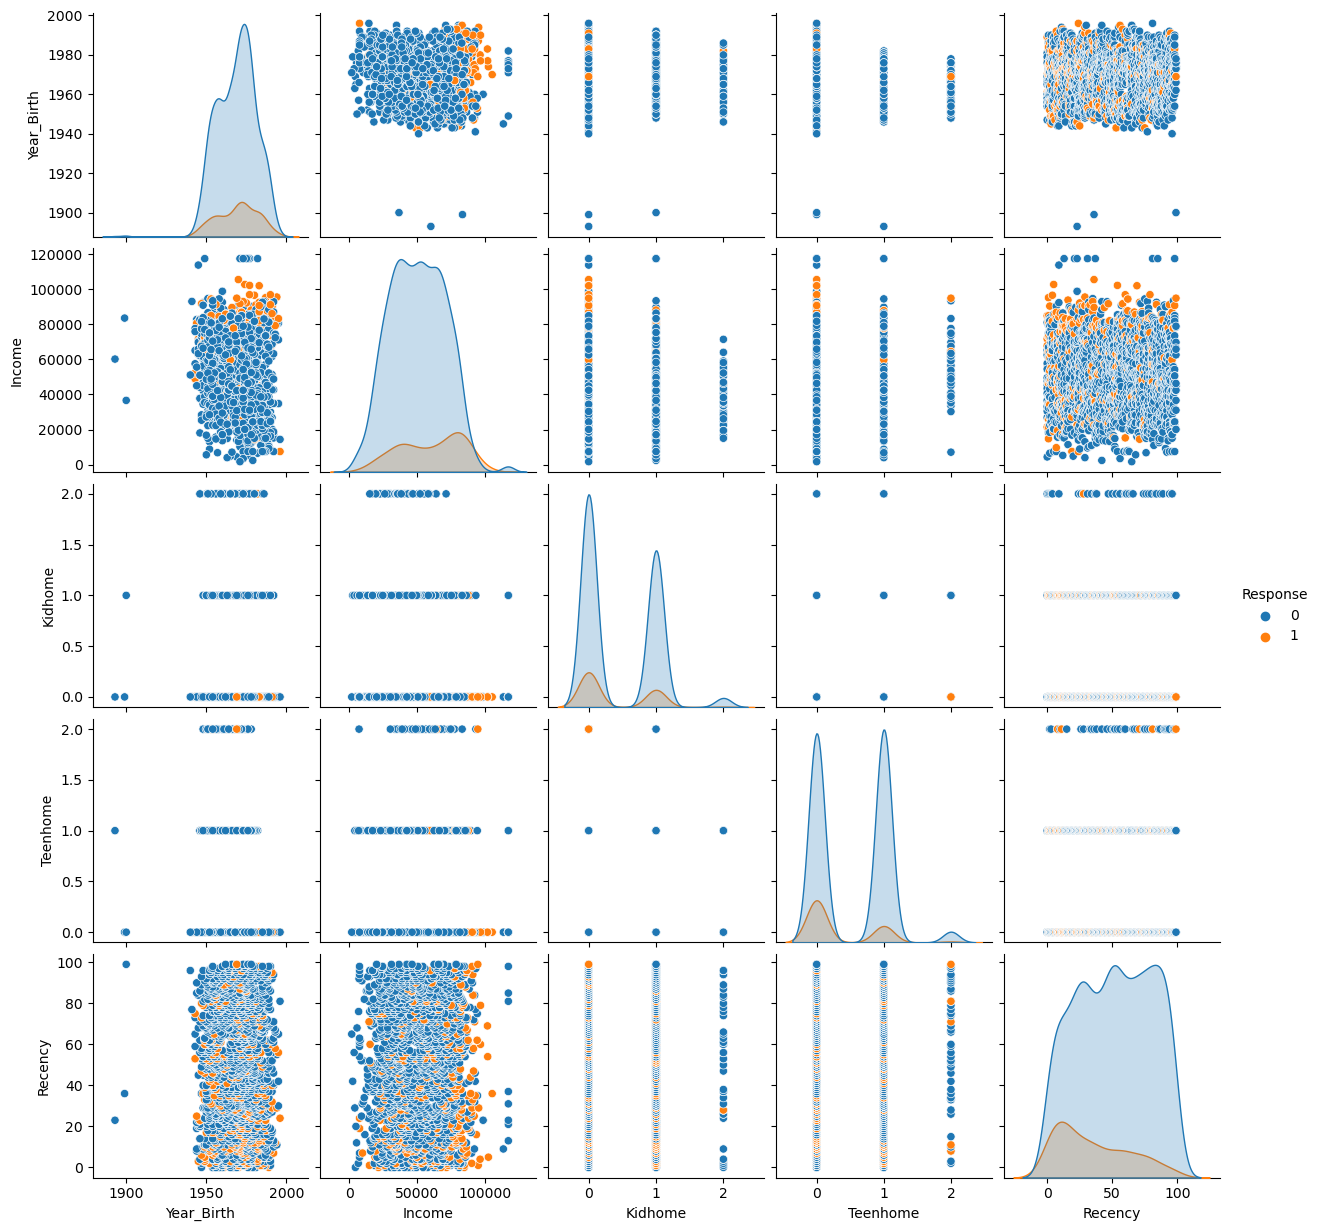

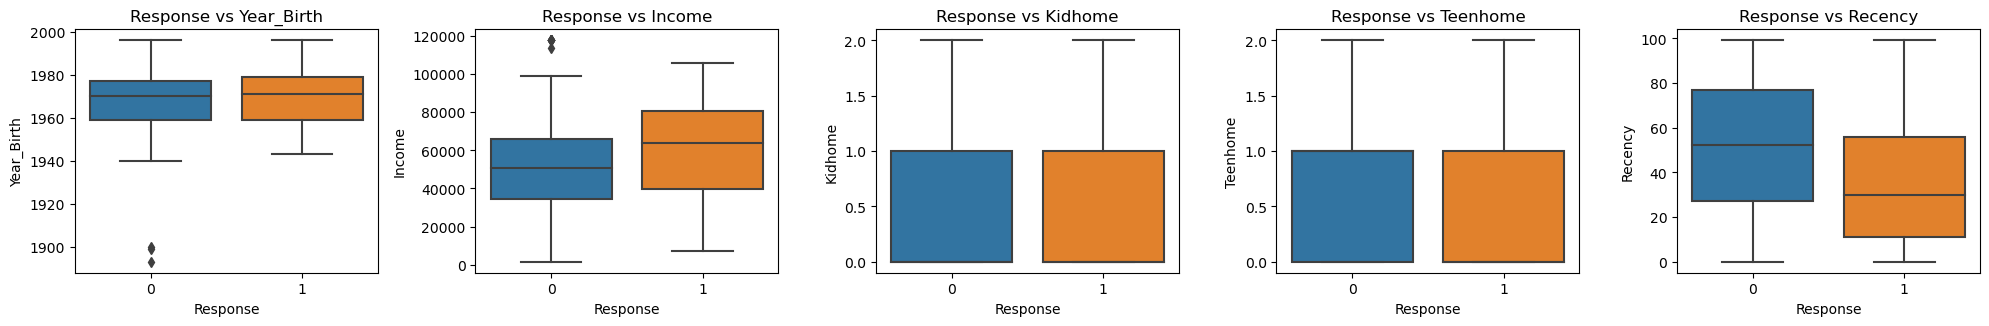

In [19]:
# Bivariate Analysis for Numerical Variables 
# Define numerical variables (Customer Information)
numerical_vars_1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']

# Plot pair plots
sns.pairplot(sale_1, hue='Response', vars=numerical_vars_1)
plt.show()

# Plot box plots to explore relationship between 'Response' and numerical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars_1):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='Response', y=var, data=sale_1)
    plt.title(f'Response vs {var}')

plt.tight_layout()
plt.show()

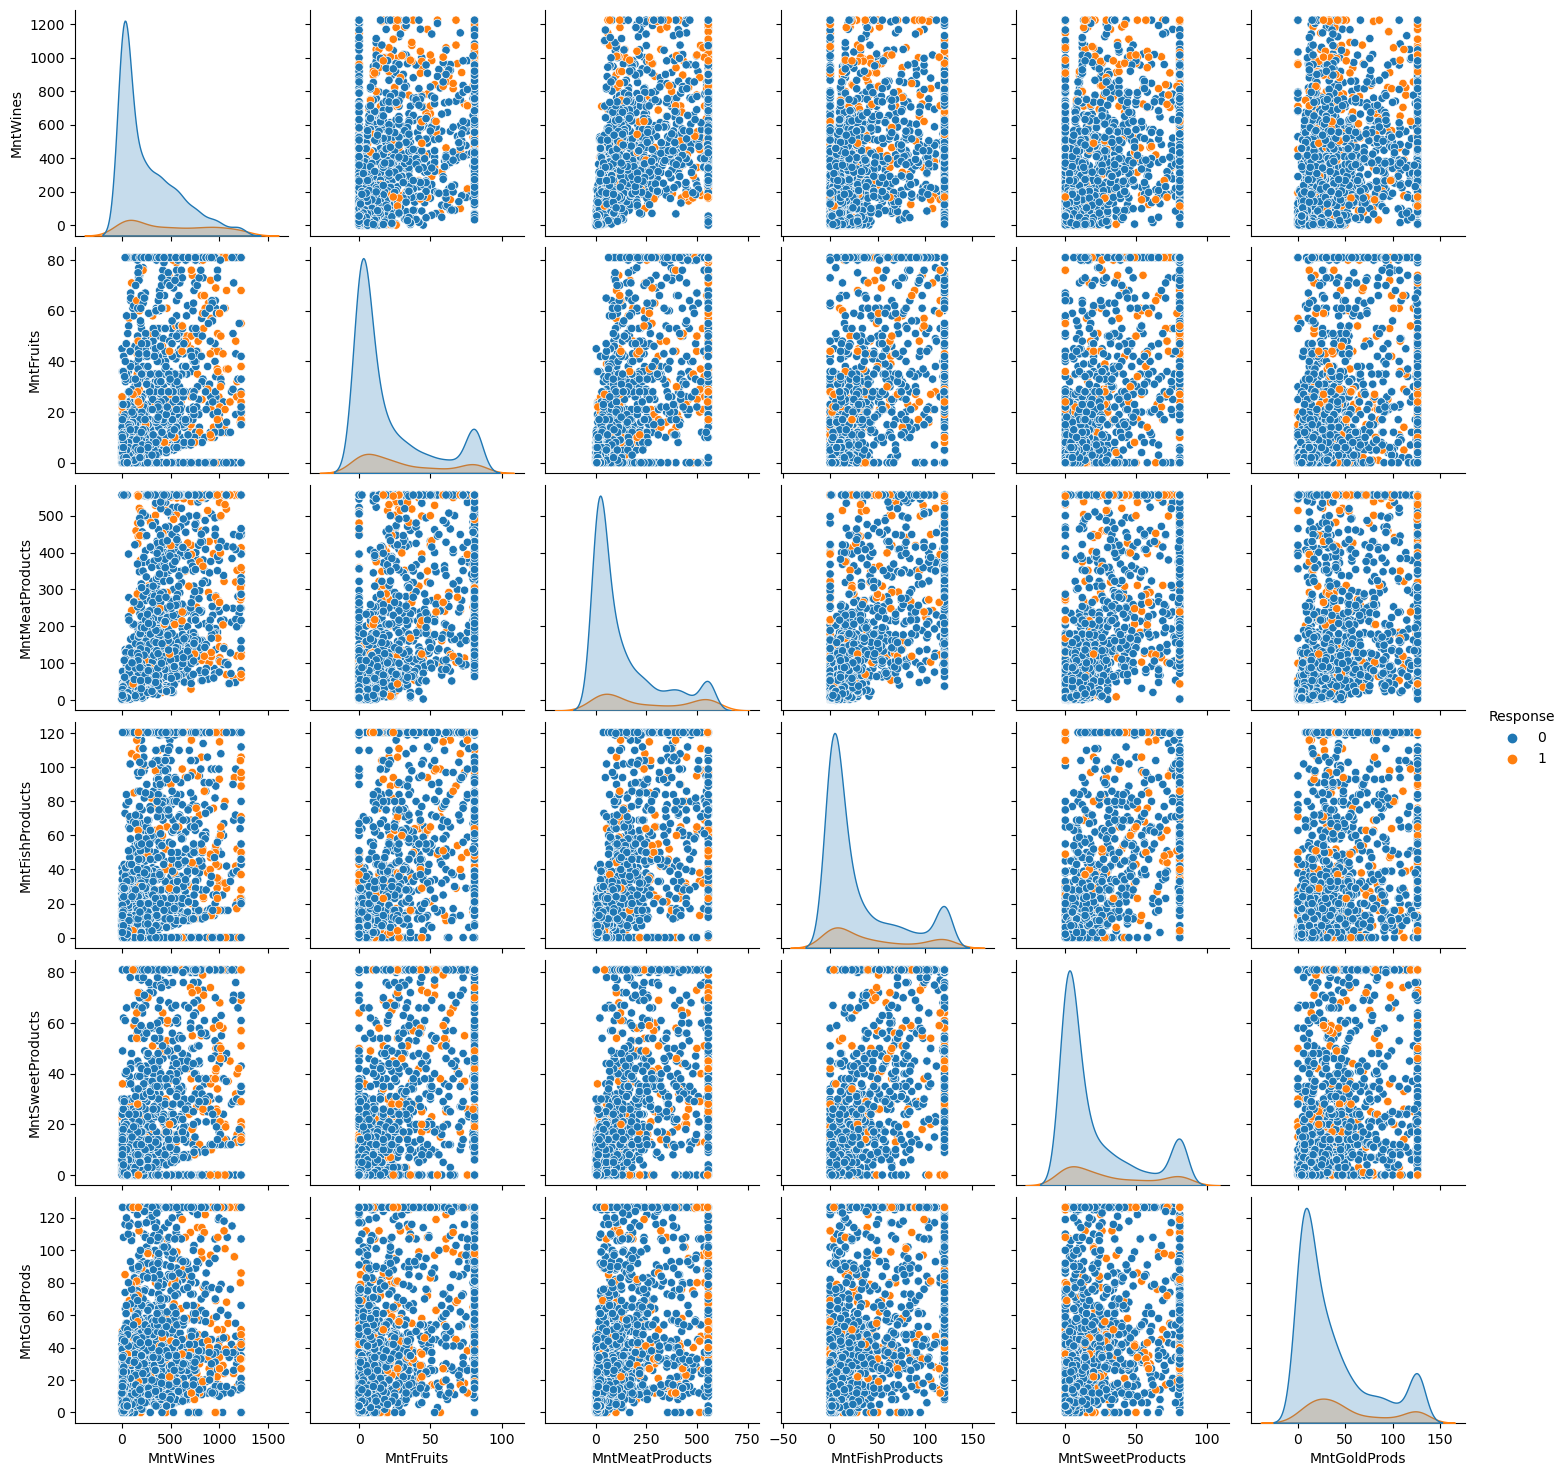

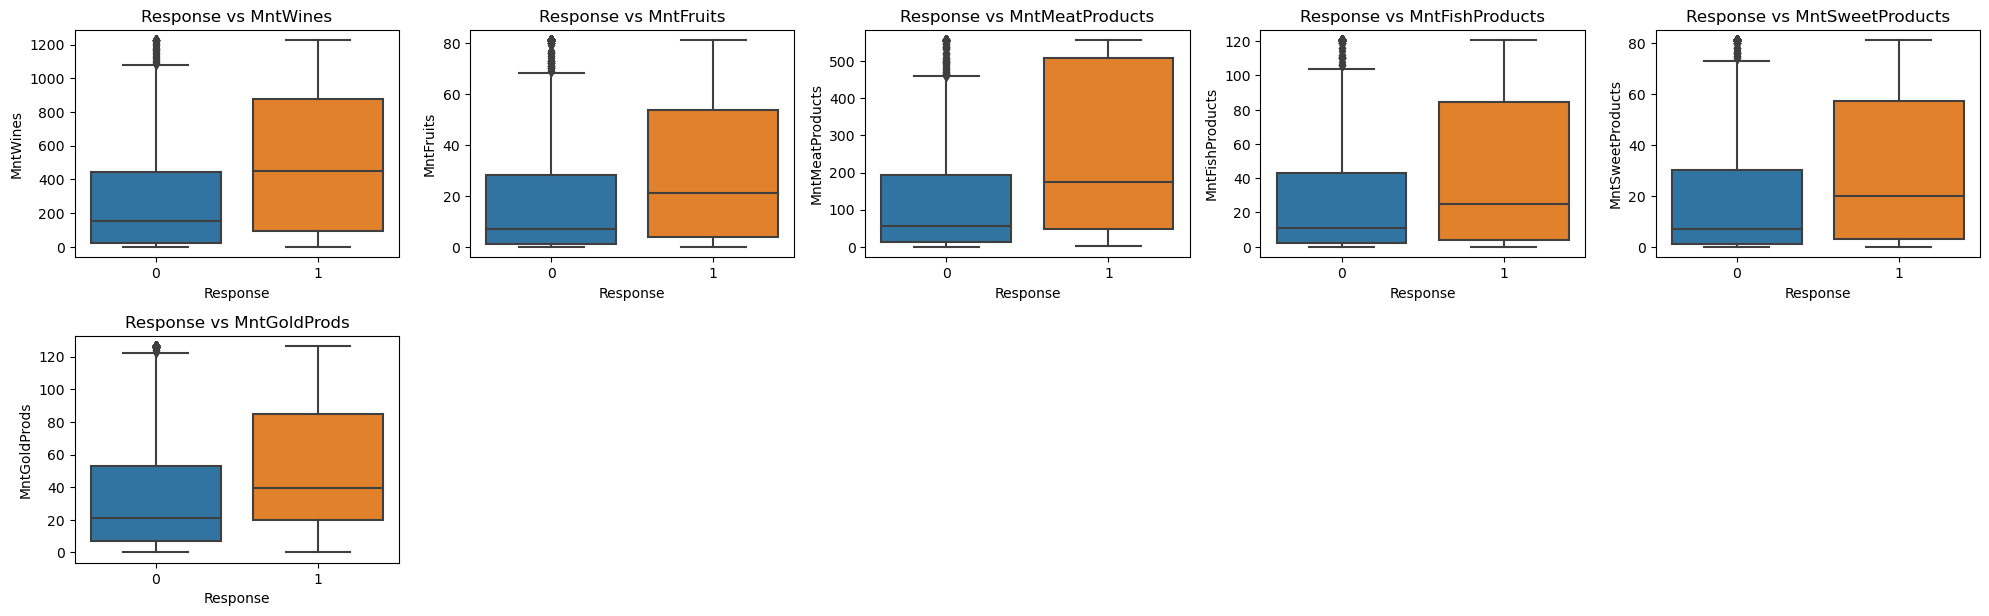

In [20]:
# Bivariate Analysis for Numerical Variables
# Define numerical variables (Customer Purchase Type)
numerical_vars_2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds']

# Plot pair plots
sns.pairplot(sale_1, hue='Response', vars=numerical_vars_2)
plt.show()

# Plot box plots to explore relationship between 'Response' and numerical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars_2):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='Response', y=var, data=sale_1)
    plt.title(f'Response vs {var}')

plt.tight_layout()
plt.show()

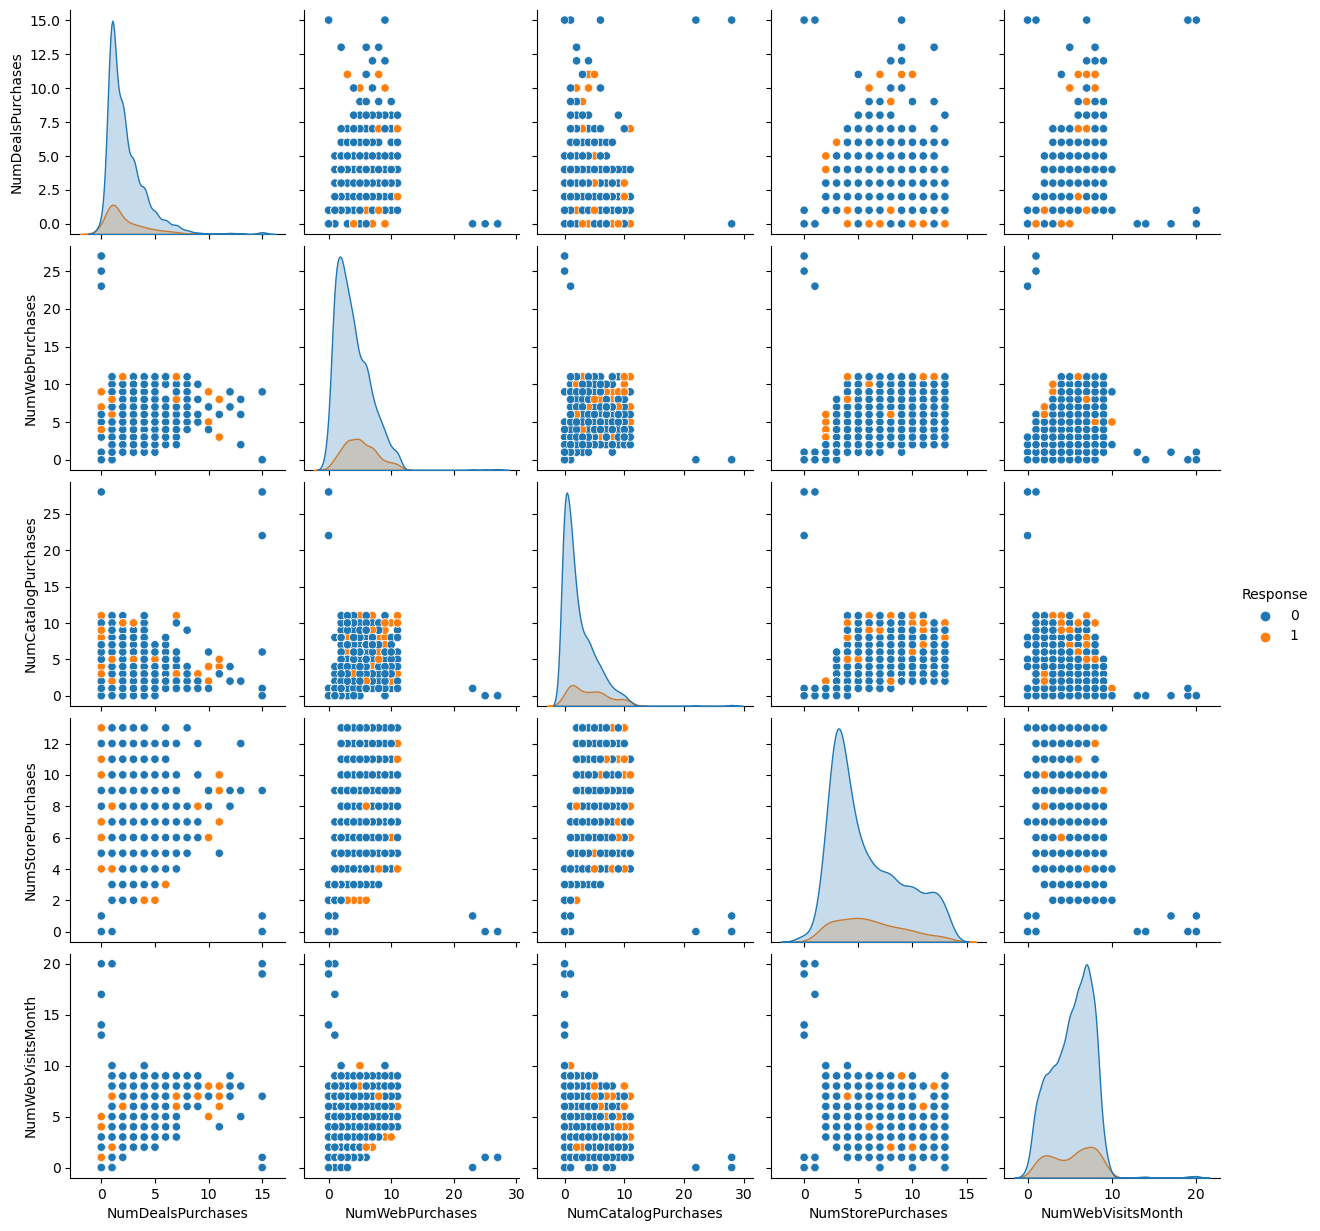

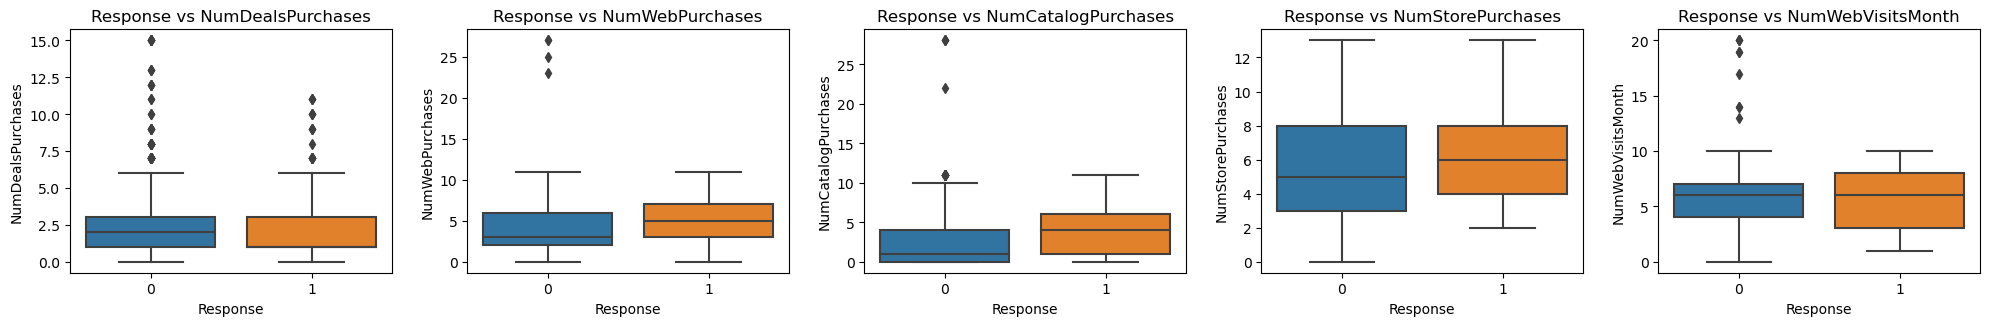

In [21]:
# Bivariate Analysis for Numerical Variables
# Define numerical variables (Customer Purchase Habbit)
numerical_vars_3 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                  'NumStorePurchases','NumWebVisitsMonth']

# Plot pair plots
sns.pairplot(sale_1, hue='Response', vars=numerical_vars_3)
plt.show()

# Plot box plots to explore relationship between 'Response' and numerical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars_3):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='Response', y=var, data=sale_1)
    plt.title(f'Response vs {var}')

plt.tight_layout()
plt.show()

**Output:**
-  **Pair Plots:** Visualize relationships between numerical variables and 'Response'.
-  **Box Plots:** Highlight differences in distributions of numerical variables based on 'Response'.
-  **Correlation Matrix:** Show the correlation coefficients between numerical variables and 'Response'.

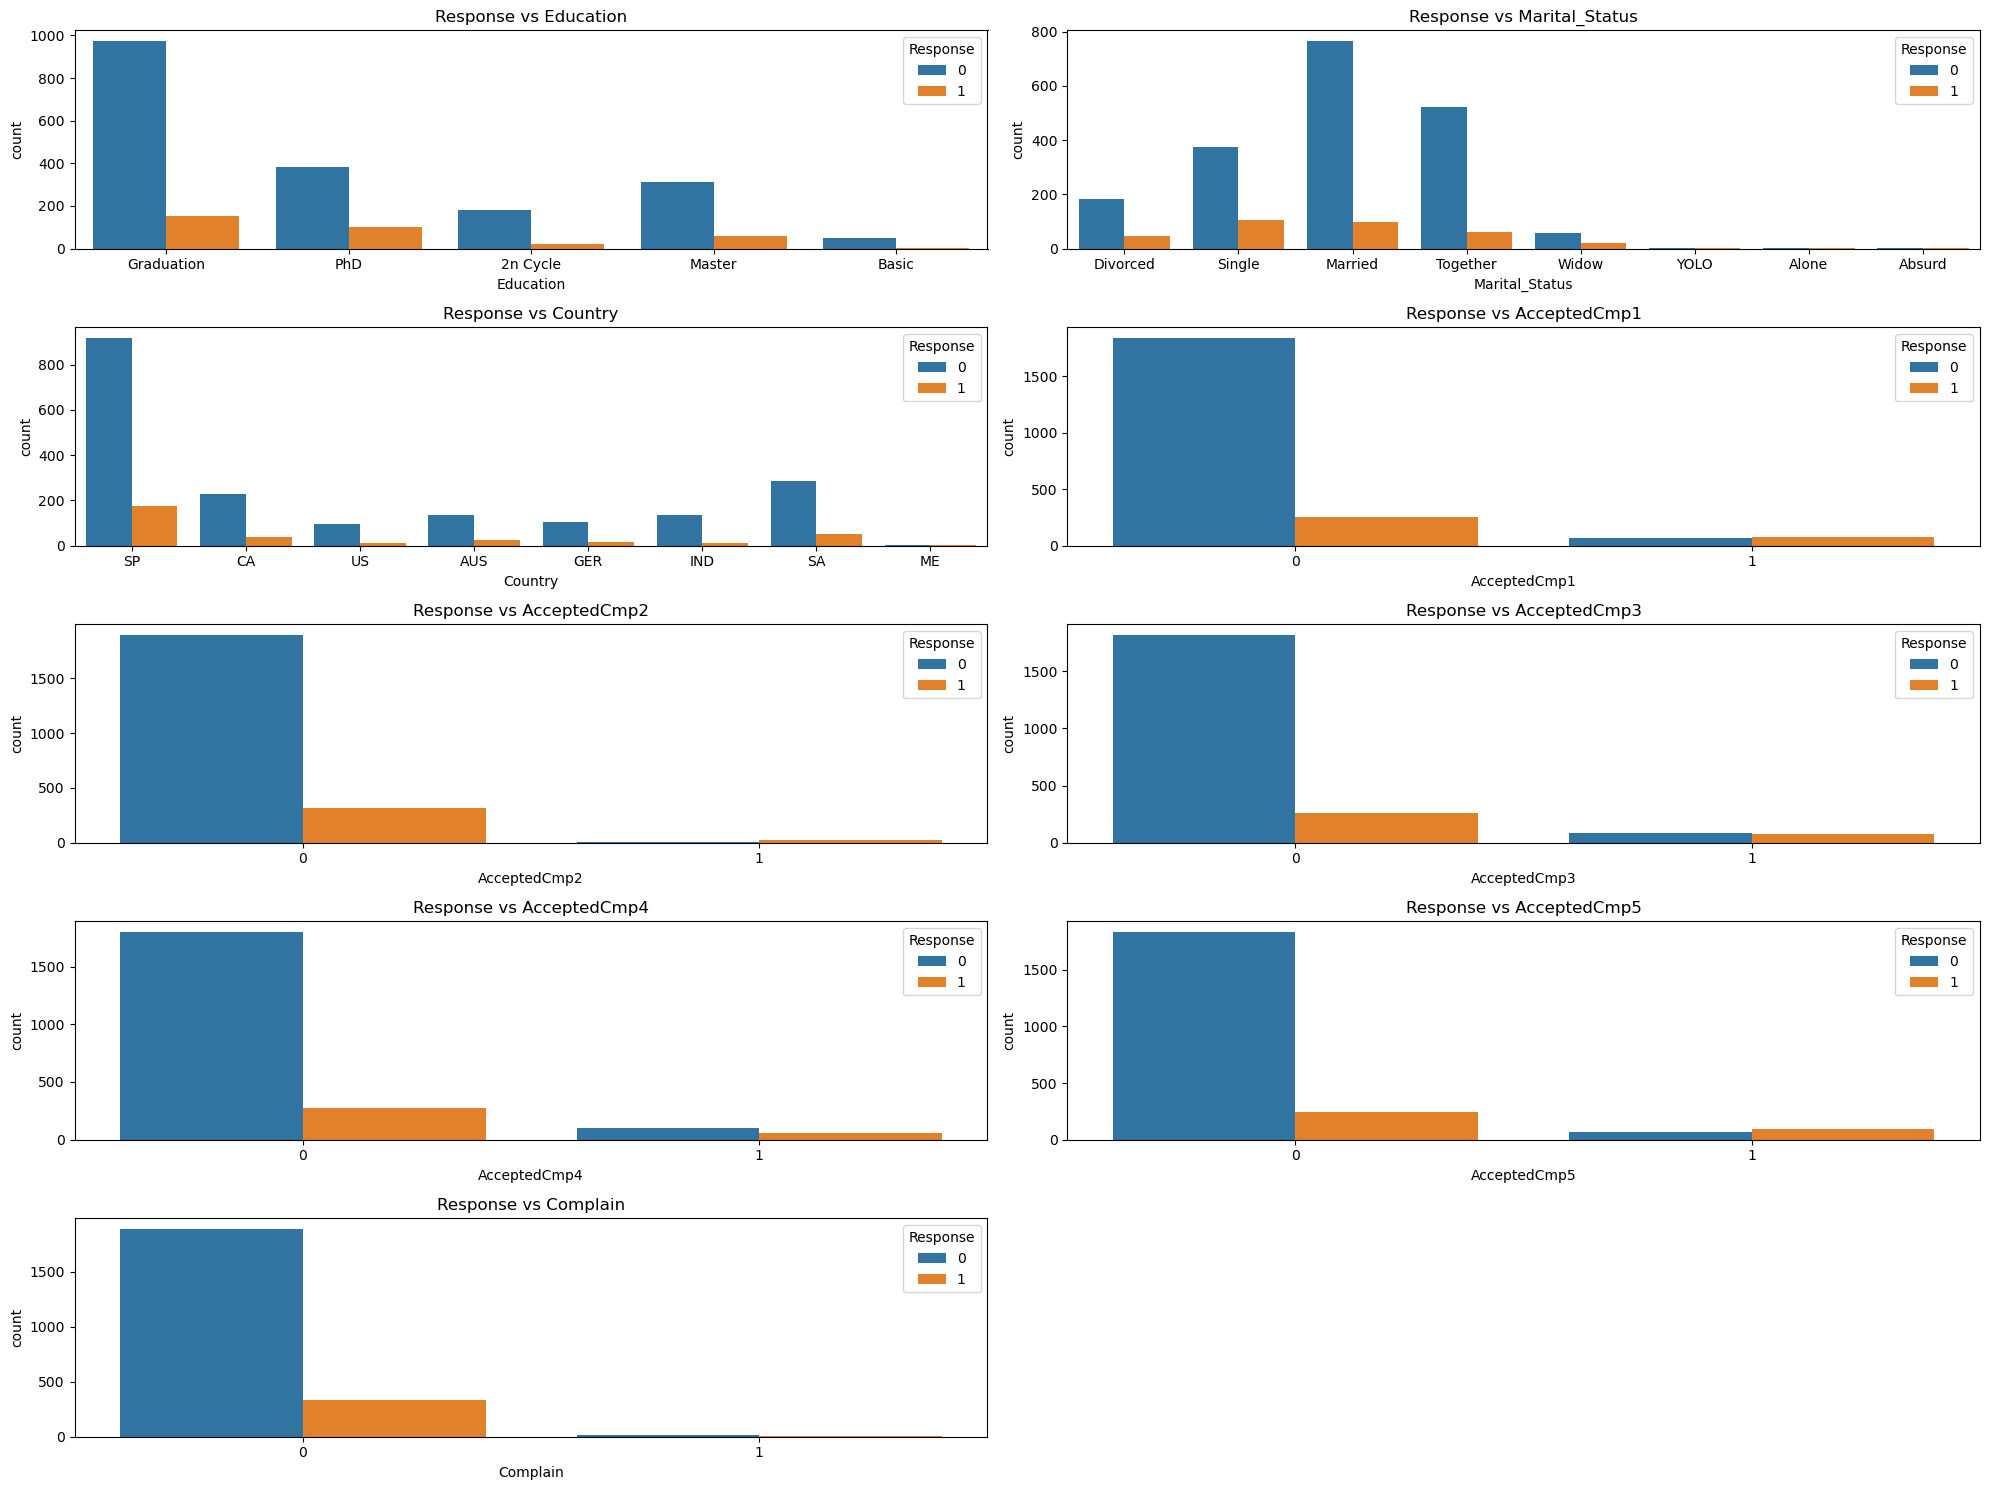

                     p-value
Education       1.222698e-04
Marital_Status  2.106747e-09
Country         7.415067e-02
AcceptedCmp1    2.815498e-43
AcceptedCmp2    8.878118e-15
AcceptedCmp3    9.364996e-33
AcceptedCmp4    1.395368e-16
AcceptedCmp5    3.828045e-53
Complain        1.000000e+00


In [22]:
# Bivariate Analysis for Categorical Variables
categorical_vars = [
    'Education', 'Marital_Status', 'Country',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Complain'
]

# Plot bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_vars):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=var, hue='Response', data=sale_1)
    plt.title(f'Response vs {var}')

plt.tight_layout()
plt.show()

# Perform Chi-Square test for categorical variables
chi2_results = {}
for var in categorical_vars:
    contingency_table = pd.crosstab(sale[var], sale_1['Response'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[var] = p

# Display Chi-Square test results
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['p-value'])
print(chi2_results_df)

**Output:**
-  **Bar Plots:** Display the distribution of categorical variables based on 'Response'.
-  **Chi-Square Test Results:** Provide p-values indicating the significance of relationships between categorical variables and 'Response'.

# Multivariate Analysis

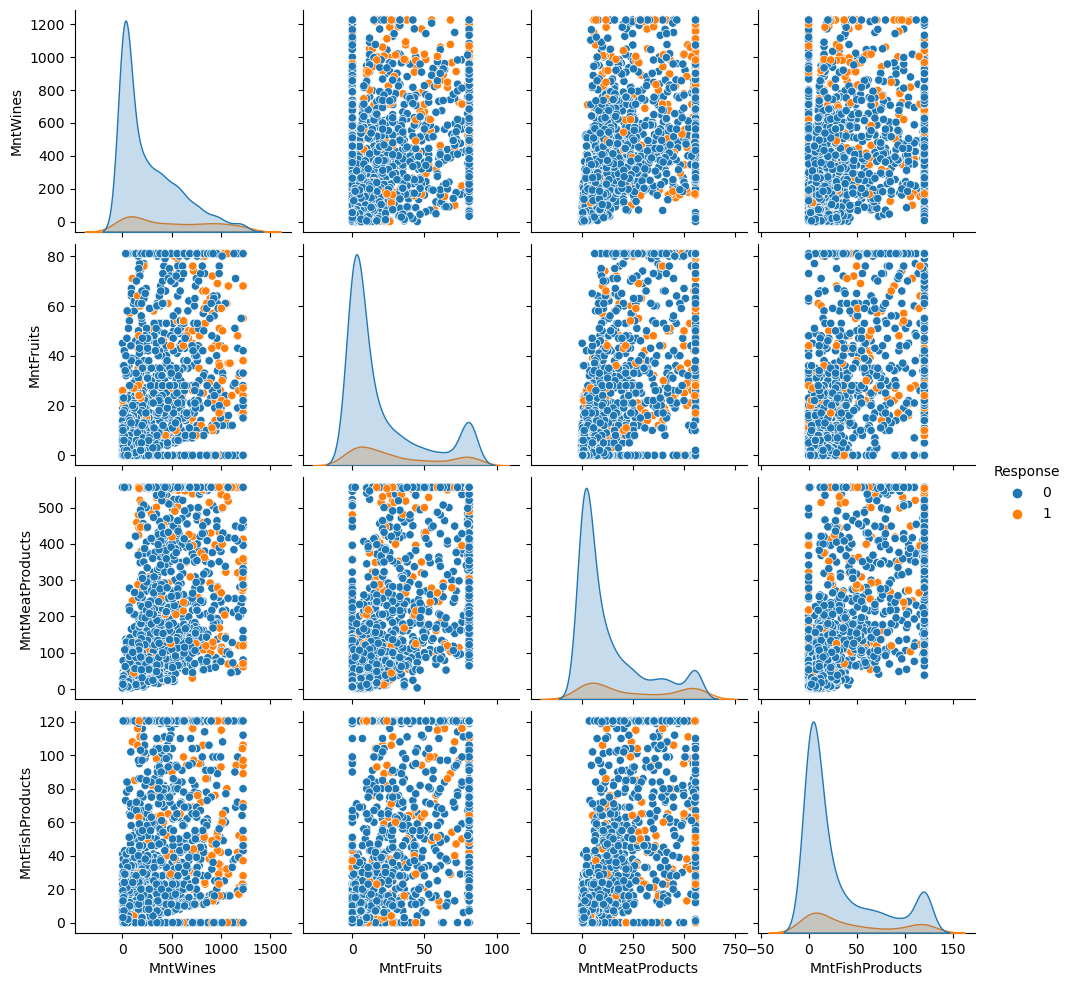

In [23]:
# Multivariate Analysis

purchase_columns_1 = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'Response'
]

# Create a new DataFrame with the selected columns
purchase_df = sale_1[purchase_columns_1]

# Visualize the pair plot
sns.pairplot(purchase_df, hue='Response')
plt.show()

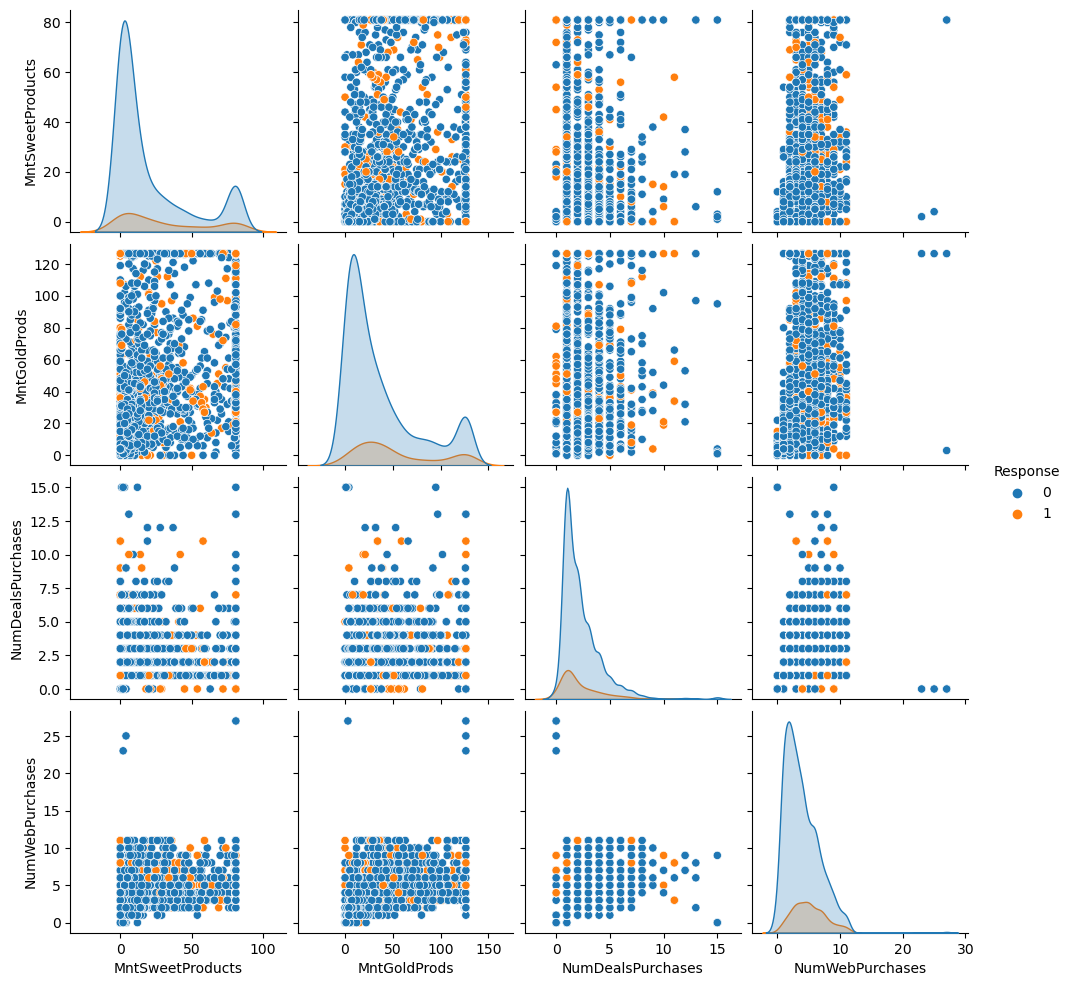

In [24]:
# Multivariate Analysis

purchase_columns_2 = [
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'Response'
]

# Create a new DataFrame with the selected columns
purchase_2_df = sale_1[purchase_columns_2]

# Visualize the pair plot
sns.pairplot(purchase_2_df, hue='Response')
plt.show()

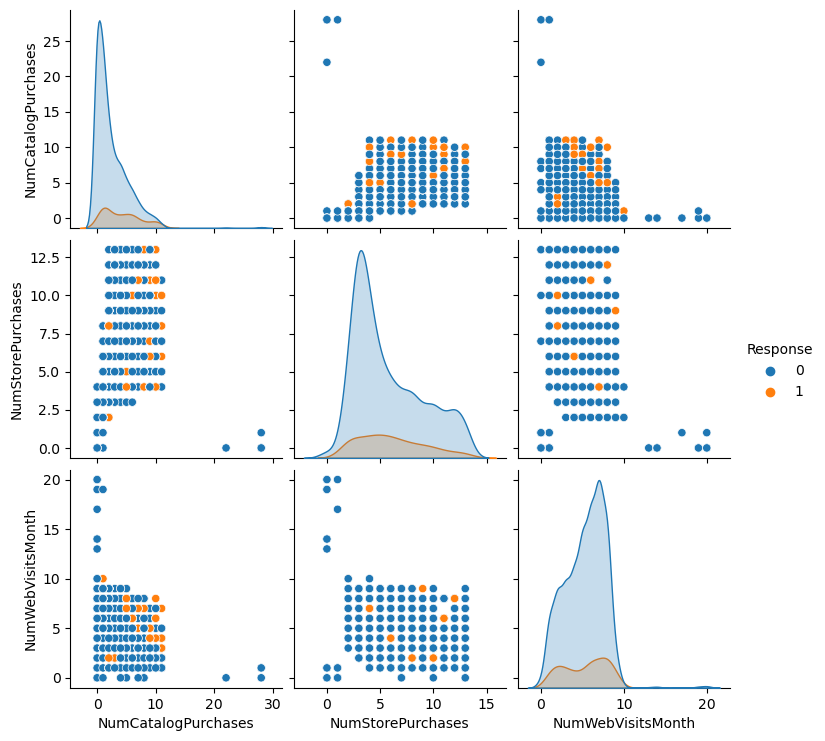

In [25]:
# Multivariate Analysis

purchase_columns_3 = [
    'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Response'
]

# Create a new DataFrame with the selected columns
purchase_3_df = sale_1[purchase_columns_3]

# Visualize the pair plot
sns.pairplot(purchase_3_df, hue='Response')
plt.show()

# Business Analysis and Hypothesis (Task 2)
**1. Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns.**

**Step 1: Formulate Hypotheses**<BR>
**Hypothesis 1:** There is a positive correlation between the amount spent on wines (MntWines) and the number of campaigns accepted.<BR>
**Hypothesis 2:** Customers who have accepted at least one campaign spend more on average across all categories compared to those who have not accepted any campaign.

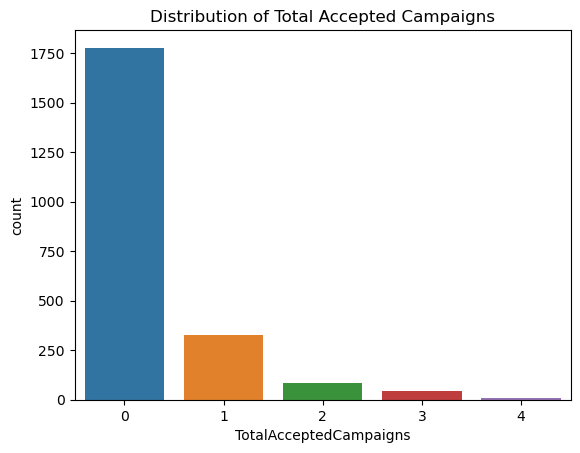

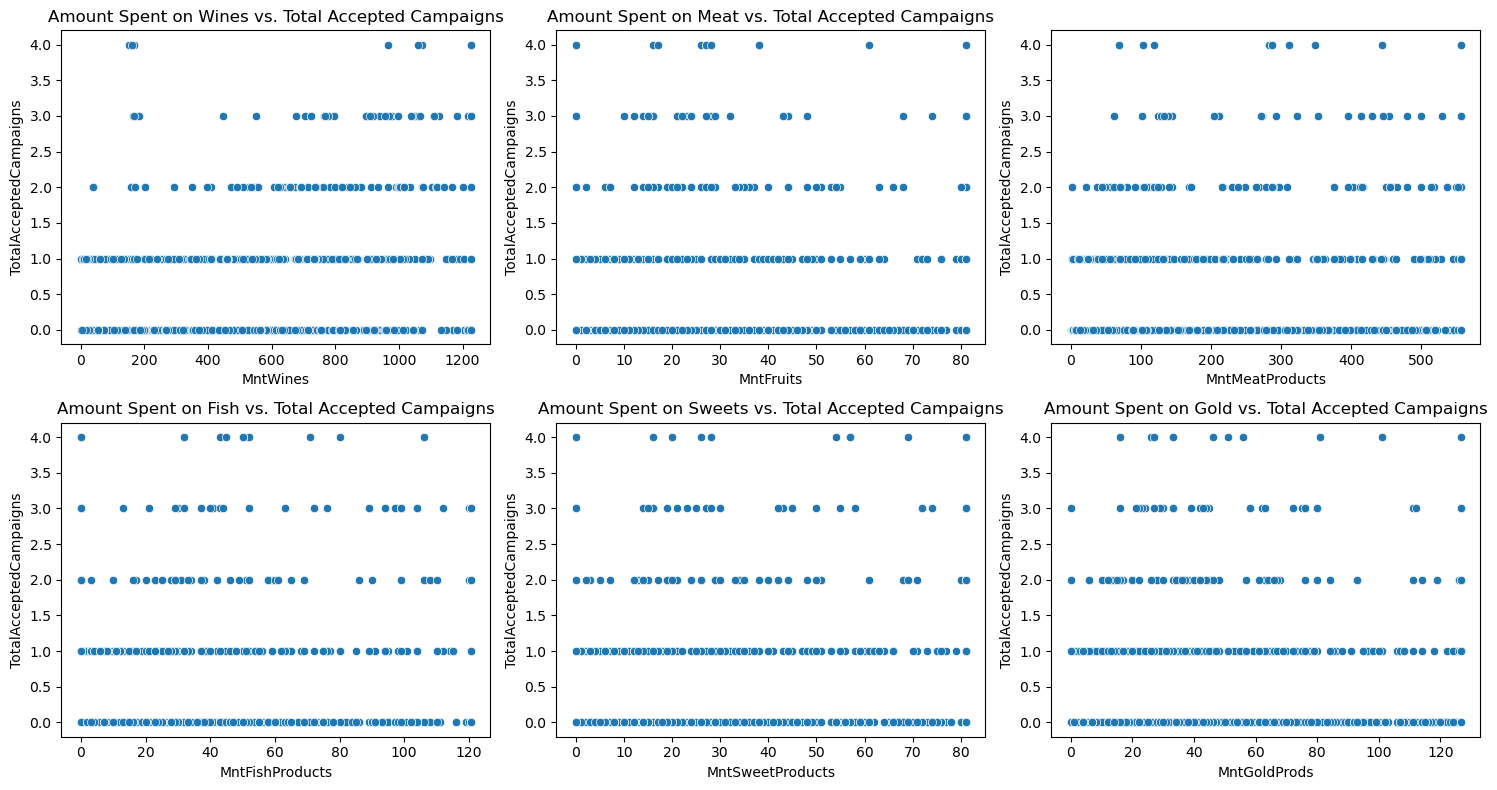

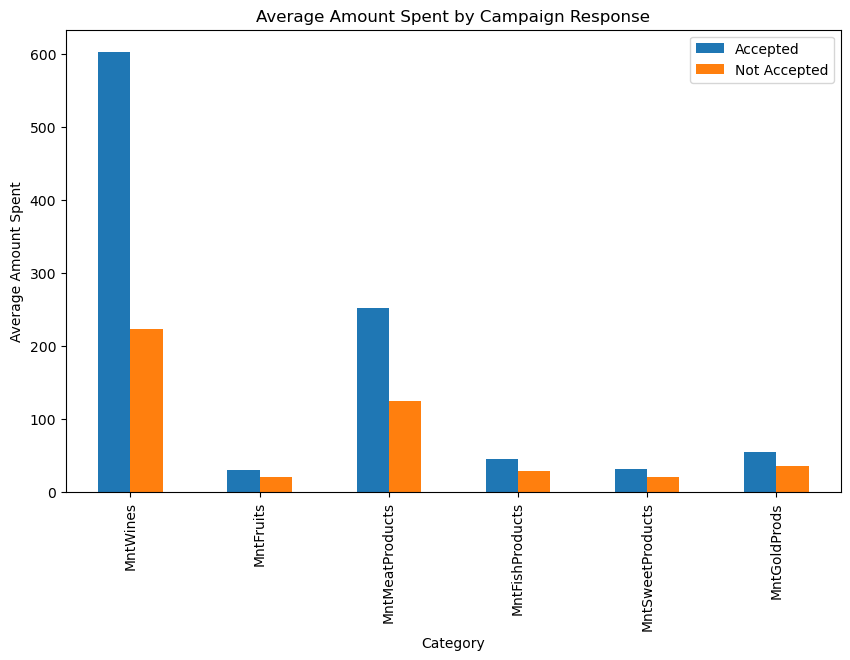

In [26]:
# Creating a new column for the total number of campaigns accepted
sale_1['TotalAcceptedCampaigns'] = (
    sale_1['AcceptedCmp1'] + sale_1['AcceptedCmp2'] +
    sale_1['AcceptedCmp3'] + sale_1['AcceptedCmp4'] +
    sale_1['AcceptedCmp5']
)

# Creating a new column for the total amount spent
sale_1['TotalMntSpent'] = (
    sale_1['MntWines'] + sale_1['MntFruits'] +
    sale_1['MntMeatProducts'] + sale_1['MntFishProducts'] +
    sale_1['MntSweetProducts'] + sale_1['MntGoldProds']
)

# Plotting the distribution of TotalAcceptedCampaigns
sns.countplot(data=sale_1, x='TotalAcceptedCampaigns')
plt.title('Distribution of Total Accepted Campaigns')
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plotting the relationship between amount spent on wines and total accepted campaigns
sns.scatterplot(data=sale_1, x='MntWines', y='TotalAcceptedCampaigns', ax=axes[0, 0])
axes[0, 0].set_title('Amount Spent on Wines vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on fruits and total accepted campaigns
sns.scatterplot(data=sale_1, x='MntFruits', y='TotalAcceptedCampaigns', ax=axes[0, 1])
axes[0, 1].set_title('Amount Spent on Fruits vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on meat and total accepted campaigns
sns.scatterplot(data=sale_1, x='MntMeatProducts', y='TotalAcceptedCampaigns', ax=axes[0, 2])
axes[0, 1].set_title('Amount Spent on Meat vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on fish and total accepted campaigns
sns.scatterplot(data=sale_1, x='MntFishProducts', y='TotalAcceptedCampaigns', ax=axes[1, 0])
axes[1, 0].set_title('Amount Spent on Fish vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on sweets and total accepted campaigns
sns.scatterplot(data=sale_1, x='MntSweetProducts', y='TotalAcceptedCampaigns', ax=axes[1, 1])
axes[1, 1].set_title('Amount Spent on Sweets vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on gold and total accepted campaigns
sns.scatterplot(data=sale_1, x='MntGoldProds', y='TotalAcceptedCampaigns', ax=axes[1, 2])
axes[1, 2].set_title('Amount Spent on Gold vs. Total Accepted Campaigns')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the average amount spent across different categories for customers who accepted at least one campaign vs. those who did not
accepted_df = sale_1[sale_1['TotalAcceptedCampaigns'] > 0]
not_accepted_df = sale_1[sale_1['TotalAcceptedCampaigns'] == 0]

categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

accepted_avg_spent = accepted_df[categories].mean()
not_accepted_avg_spent = not_accepted_df[categories].mean()

avg_spent_df = pd.DataFrame({
    'Category': categories,
    'Accepted': accepted_avg_spent.values,
    'Not Accepted': not_accepted_avg_spent.values
})

avg_spent_df.plot(kind='bar', x='Category', figsize=(10, 6))
plt.title('Average Amount Spent by Campaign Response')
plt.ylabel('Average Amount Spent')
plt.show()

**Conduct Statistical Tests** <BR>
**Hypothesis 1:** Correlation between Amount Spent on Wines and Campaign Responses

In [27]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(sale_1['MntWines'], sale_1['TotalAcceptedCampaigns'])
print(f"Pearson correlation: {correlation}, p-value: {p_value}")

# Check if the correlation is statistically significant
if p_value < 0.05:
    print("There is a statistically significant correlation between the amount spent on wines and the number of campaigns accepted.")
else:
    print("There is no statistically significant correlation between the amount spent on wines and the number of campaigns accepted.")

Pearson correlation: 0.5053875063432159, p-value: 1.5626315454833907e-145
There is a statistically significant correlation between the amount spent on wines and the number of campaigns accepted.


**Hypothesis 2:** Difference in Spending between Campaign Responders and Non-Responders

In [28]:
from scipy.stats import ttest_ind

# Conduct t-tests for each category
for category in categories:
    t_stat, p_val = ttest_ind(accepted_df[category], not_accepted_df[category])
    print(f"{category}: t-statistic = {t_stat}, p-value = {p_val}")

    # Check if the difference is statistically significant
    if p_val < 0.05:
        print(f"There is a statistically significant difference in {category} spending between customers who accepted at least one campaign and those who did not.")
    else:
        print(f"There is no statistically significant difference in {category} spending between customers who accepted at least one campaign and those who did not.")

MntWines: t-statistic = 24.84506642435201, p-value = 1.5199648447708778e-120
There is a statistically significant difference in MntWines spending between customers who accepted at least one campaign and those who did not.
MntFruits: t-statistic = 6.663368090529152, p-value = 3.358463082472472e-11
There is a statistically significant difference in MntFruits spending between customers who accepted at least one campaign and those who did not.
MntMeatProducts: t-statistic = 14.33425683981263, p-value = 1.1909861846677117e-44
There is a statistically significant difference in MntMeatProducts spending between customers who accepted at least one campaign and those who did not.
MntFishProducts: t-statistic = 8.172587232859103, p-value = 4.992724112320506e-16
There is a statistically significant difference in MntFishProducts spending between customers who accepted at least one campaign and those who did not.
MntSweetProducts: t-statistic = 8.077914177604985, p-value = 1.0656506481676232e-15
The

**2. Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc**

**Steps for Funnel Analysis**
-  Load the Data: Ensure the data is in the correct format.
-  Calculate Acceptance Rates: Determine the number and percentage of customers who accepted each campaign.
-  Visualize the Funnel: Create a visualization to represent the funnel analysis.

     Campaign  Accepted  Percentage
0  Campaign 1       144    6.428571
1  Campaign 2        30    1.339286
2  Campaign 3       163    7.276786
3  Campaign 4       167    7.455357
4  Campaign 5       163    7.276786


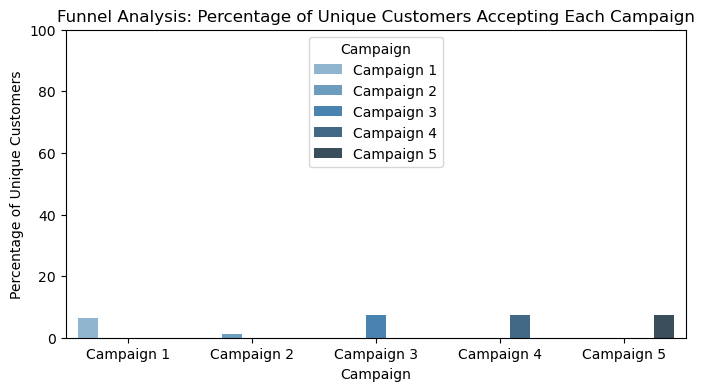

In [29]:
# Step 1: Calculate the total number of unique customers
total_customers = sale_1['ID'].nunique()

# Step 2: Calculate the number of customers who accepted each campaign
accepted_cmp1 = sale_1['AcceptedCmp1'].sum()
accepted_cmp2 = sale_1['AcceptedCmp2'].sum()
accepted_cmp3 = sale_1['AcceptedCmp3'].sum()
accepted_cmp4 = sale_1['AcceptedCmp4'].sum()
accepted_cmp5 = sale_1['AcceptedCmp5'].sum()

# Step 3: Calculate the percentage of unique customers who accepted each campaign
percentage_cmp1 = (accepted_cmp1 / total_customers) * 100
percentage_cmp2 = (accepted_cmp2 / total_customers) * 100
percentage_cmp3 = (accepted_cmp3 / total_customers) * 100
percentage_cmp4 = (accepted_cmp4 / total_customers) * 100
percentage_cmp5 = (accepted_cmp5 / total_customers) * 100

# Create a DataFrame for the funnel analysis
funnel_data = {
    'Campaign': ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'],
    'Accepted': [accepted_cmp1, accepted_cmp2, accepted_cmp3, accepted_cmp4, accepted_cmp5],
    'Percentage': [percentage_cmp1, percentage_cmp2, percentage_cmp3, percentage_cmp4, percentage_cmp5]
}
funnel_df = pd.DataFrame(funnel_data)

# Display the funnel DataFrame
print(funnel_df)

# Plotting the funnel analysis

plt.figure(figsize=(8, 4))
sns.barplot(data=funnel_df, x='Campaign', y='Percentage', palette='Blues_d', hue='Campaign')
plt.title('Funnel Analysis: Percentage of Unique Customers Accepting Each Campaign')
plt.ylabel('Percentage of Unique Customers')
plt.xlabel('Campaign')
plt.ylim(0, 100)
plt.show()

**3. Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products**

**Steps taken:**
-  **Correlation Analysis:** Calculate the correlation between income and the amounts spent on the specified products.
-  **Scatter Plots:** Visualize the relationship between income and the amounts spent using scatter plots.
-  **Regression Analysis:** Fit a linear regression model to understand the strength and nature of the relationship.

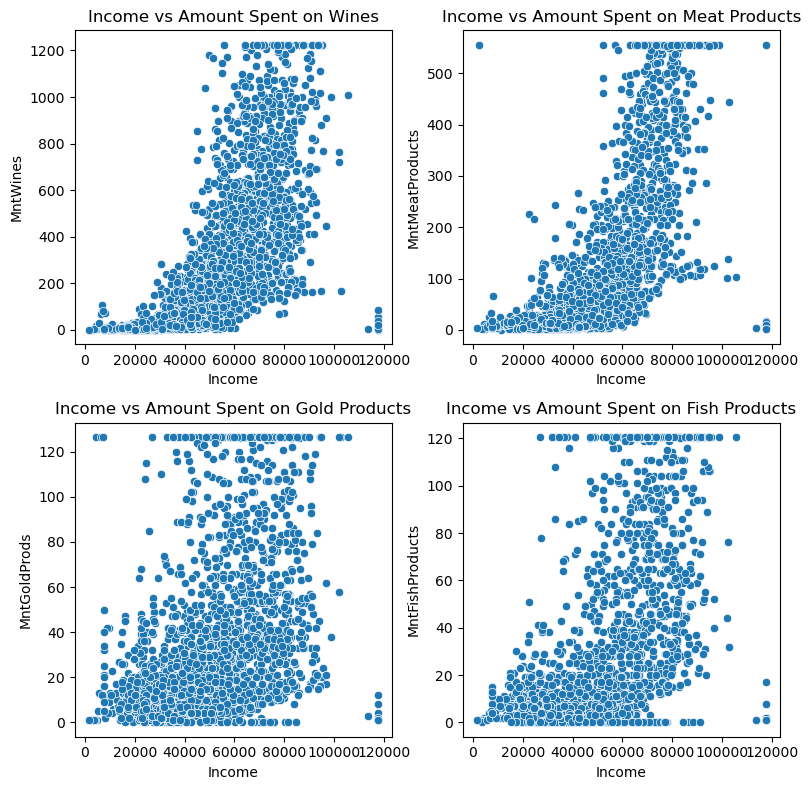

Correlation between Income and MntWines: 0.71
Correlation between Income and MntMeatProducts: 0.74
Correlation between Income and MntGoldProds: 0.44
Correlation between Income and MntFishProducts: 0.58
Regression results for MntWines:
  Intercept: -279.89562032944383
  Slope: 0.011219409709400626
  R-squared: 0.50



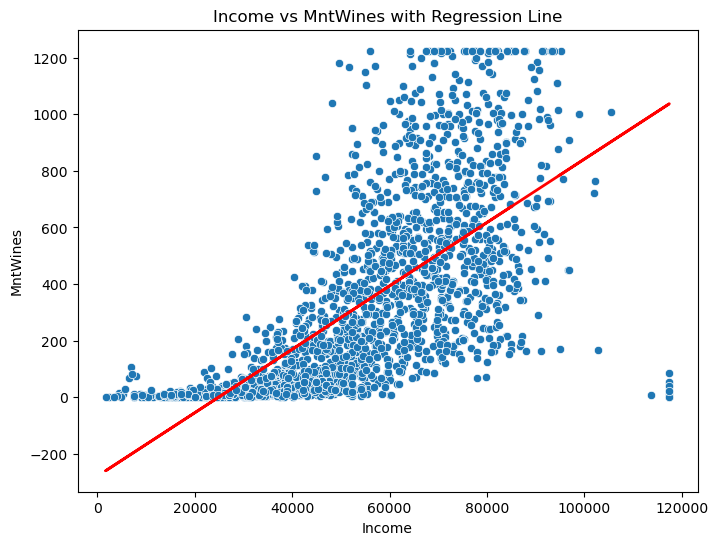

Regression results for MntMeatProducts:
  Intercept: -175.1730167477755
  Slope: 0.006285210320094034
  R-squared: 0.54



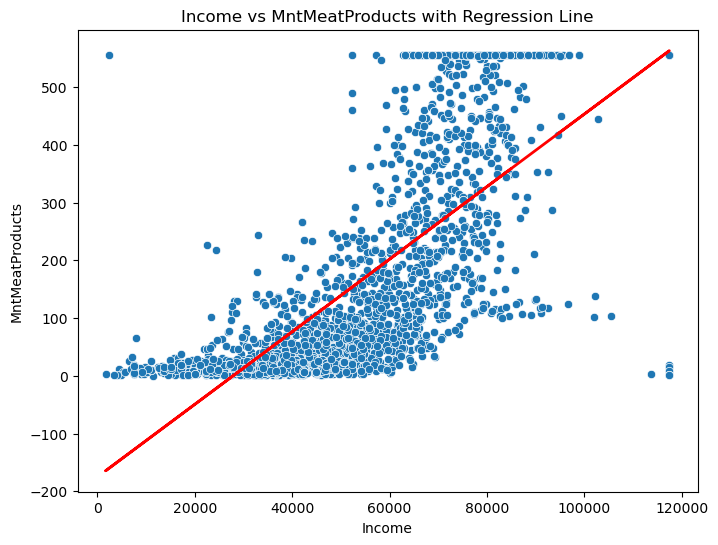

Regression results for MntGoldProds:
  Intercept: -4.19518558040761
  Slope: 0.0008420777271304569
  R-squared: 0.19



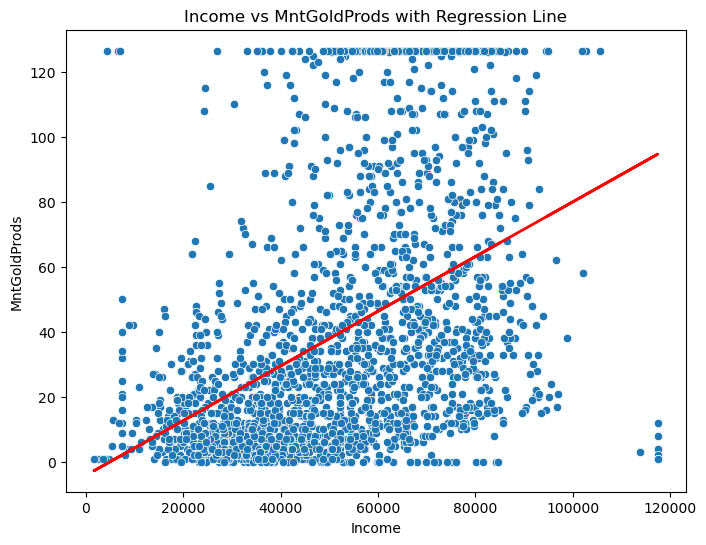

Regression results for MntFishProducts:
  Intercept: -25.9517725492204
  Slope: 0.001119372575260984
  R-squared: 0.34



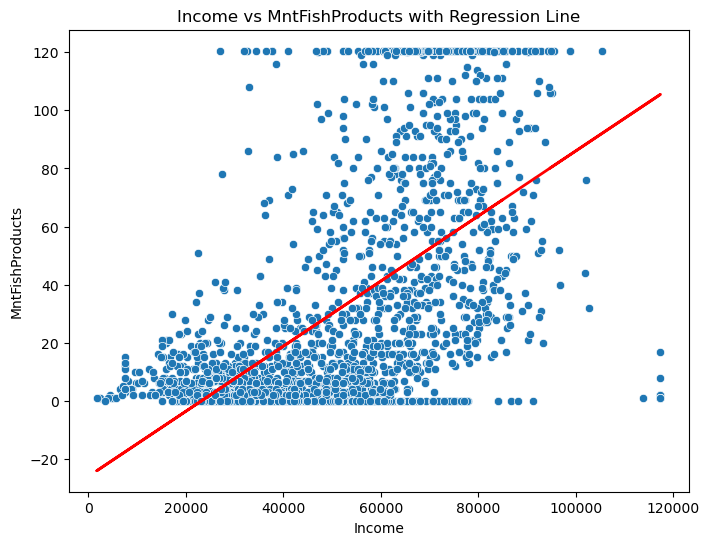

In [30]:
# Creating scatter plots to visualize the relationship between income and spending on each category.

plt.figure(figsize=(8, 8))

# Plotting Income vs MntWines
plt.subplot(2, 2, 1)
sns.scatterplot(data=sale_1, x='Income', y='MntWines')
plt.title('Income vs Amount Spent on Wines')

# Plotting Income vs MntMeatProducts
plt.subplot(2, 2, 2)
sns.scatterplot(data=sale_1, x='Income', y='MntMeatProducts')
plt.title('Income vs Amount Spent on Meat Products')

# Plotting Income vs MntGoldProds
plt.subplot(2, 2, 3)
sns.scatterplot(data=sale_1, x='Income', y='MntGoldProds')
plt.title('Income vs Amount Spent on Gold Products')

# Plotting Income vs MntFishProducts
plt.subplot(2, 2, 4)
sns.scatterplot(data=sale_1, x='Income', y='MntFishProducts')
plt.title('Income vs Amount Spent on Fish Products')

plt.tight_layout()
plt.show()

# Calculating the correlation between income and the amount spent on each category.

correlations = {
    'MntWines': sale_1['Income'].corr(sale_1['MntWines']),
    'MntMeatProducts': sale_1['Income'].corr(sale_1['MntMeatProducts']),
    'MntGoldProds': sale_1['Income'].corr(sale_1['MntGoldProds']),
    'MntFishProducts': sale_1['Income'].corr(sale_1['MntFishProducts'])
}

for key, value in correlations.items():
    print(f"Correlation between Income and {key}: {value:.2f}")

# Performing linear regression to understand the impact of income on spending.

from sklearn.linear_model import LinearRegression

def perform_regression(sale, x_column, y_column):
    X = sale_1[[x_column]]
    y = sale_1[y_column]

    model = LinearRegression()
    model.fit(X, y)

    r_squared = model.score(X, y)
    intercept = model.intercept_
    slope = model.coef_[0]

    print(f"Regression results for {y_column}:")
    print(f"  Intercept: {intercept}")
    print(f"  Slope: {slope}")
    print(f"  R-squared: {r_squared:.2f}")
    print()

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sale, x=x_column, y=y_column)
    plt.plot(sale_1[x_column], model.predict(X), color='red', linewidth=2)
    plt.title(f'{x_column} vs {y_column} with Regression Line')
    plt.show()

perform_regression(sale_1, 'Income', 'MntWines')
perform_regression(sale_1, 'Income', 'MntMeatProducts')
perform_regression(sale_1, 'Income', 'MntGoldProds')
perform_regression(sale_1, 'Income', 'MntFishProducts')

**4. Can you test the hypothesis that recent customers complain less in general compared to older customers?**

To test the hypothesis that recent customers complain less in general compared to older customers, we need to follow these steps:

**1. Define the Hypothesis:**
-  **Null Hypothesis (H0):** There is no difference in the complaint rates between recent and older customers.
-  **Alernative Hypothesis (H1):** Recent customers complain less compared to older customers.

In [31]:
from scipy.stats import chi2_contingency

# Preparing the data.

# Define a threshold to distinguish recent and older customers, e.g., the median date
threshold_date = sale_1['Dt_Customer'].median()

# Create a new column to distinguish recent and older customers
sale_1['Customer_Type'] = sale_1['Dt_Customer'].apply(lambda x: 'Recent' if x > threshold_date else 'Older')

# Calculating complaint rates
complaint_rates = sale_1.groupby('Customer_Type')['Complain'].mean()
print("Complaint Rates:")
print(complaint_rates)

# Using a chi-square test for proportions to compare the complaint rates statistically.

# Creating a contingency table
contingency_table = pd.crosstab(sale_1['Customer_Type'], sale_1['Complain'])

# Performing the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2}, P-Value: {p}")

# Interpreting the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Recent customers complain less compared to older customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in complaint rates between recent and older customers.")

Complaint Rates:
Customer_Type
Older     0.010714
Recent    0.008036
Name: Complain, dtype: float64

Chi-Square Statistic: 0.19227880426618596, P-Value: 0.6610267177005811
Fail to reject the null hypothesis: There is no significant difference in complaint rates between recent and older customers.


**5. Do people who accept the offer in the first campaign also accept in any other campaign?**

To determine if people who accept the offer in the first campaign also accept offers in any other campaign, we need to:

-  Identify the customers who accepted the first campaign.
-  Check if these customers also accepted offers in any other campaign.

In [32]:
# Filtering the customers who accepted the first campaign
accepted_cmp1 = sale_1[sale['AcceptedCmp1'] == 1].copy()

# Checking if these customers also accepted any other campaigns
accepted_cmp1.loc[:, 'AcceptedOther'] = accepted_cmp1[['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].any(axis=1)

# Calculating the proportion of customers who accepted the first campaign and also accepted each of the other campaigns
proportion_cmp2 = accepted_cmp1['AcceptedCmp2'].mean()
proportion_cmp3 = accepted_cmp1['AcceptedCmp3'].mean()
proportion_cmp4 = accepted_cmp1['AcceptedCmp4'].mean()
proportion_cmp5 = accepted_cmp1['AcceptedCmp5'].mean()
proportion_any_other = accepted_cmp1['AcceptedOther'].mean()

print(f"Proportion of customers who accepted the first campaign and also accepted the second campaign: {proportion_cmp2:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted the third campaign: {proportion_cmp3:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted the fourth campaign: {proportion_cmp4:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted the fifth campaign: {proportion_cmp5:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted any other campaign: {proportion_any_other:.2f}")

Proportion of customers who accepted the first campaign and also accepted the second campaign: 0.09
Proportion of customers who accepted the first campaign and also accepted the third campaign: 0.17
Proportion of customers who accepted the first campaign and also accepted the fourth campaign: 0.33
Proportion of customers who accepted the first campaign and also accepted the fifth campaign: 0.47
Proportion of customers who accepted the first campaign and also accepted any other campaign: 0.64


**Output**

**Proportion of Customers:** 
-  The output is showing the proportion of customers who accepted the first campaign and also accepted each of the other campaigns.
-  Additionally, it also shows the proportion of customers who accepted the first campaign and also accepted any other campaign.

**6. Profile of people who respond vs. who don’t.**

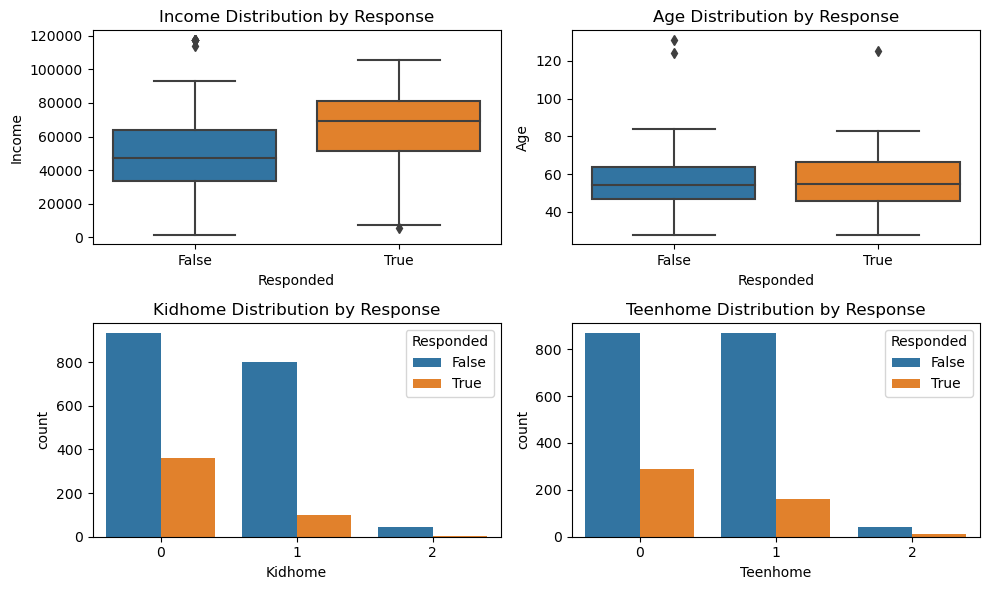

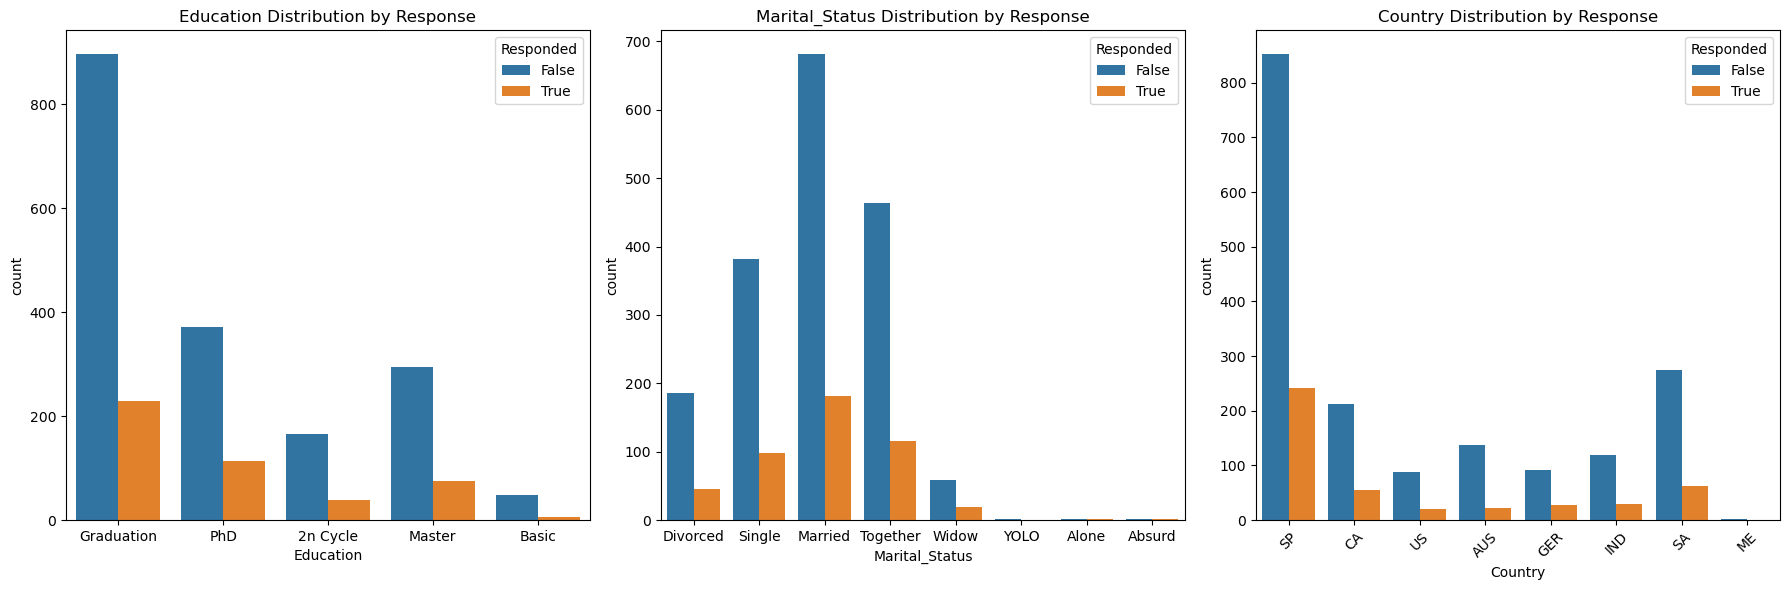

In [33]:
# Preparing the Data
sale_1['Responded'] = sale_1[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

# Summarizing the Profiles

# Summary statistics for numerical attributes
numerical_attributes = ['Income', 'Year_Birth', 'Kidhome', 'Teenhome']
summary_stats = sale_1.groupby('Responded')[numerical_attributes].describe()
#print("Summary Statistics for Numerical Attributes:")
#print(summary_stats)

# Summary statistics for categorical attributes
categorical_attributes = ['Education', 'Marital_Status', 'Country']
categorical_stats = {attr: sale_1.groupby('Responded')[attr].value_counts(normalize=True) for attr in categorical_attributes}

#for attr, stats in categorical_stats.items():
#    print(f"\n{attr} Distribution by Response:")
#    print(stats)

# Visualizing the Differences

# Setting up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plotting Income distribution
sns.boxplot(data=sale_1, x='Responded', y='Income', ax=axs[0, 0])
axs[0, 0].set_title('Income Distribution by Response')

# Plotting Age distribution
sale_1['Age'] = 2024 - sale_1['Year_Birth']
sns.boxplot(data=sale_1, x='Responded', y='Age', ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution by Response')

# Plotting Kidhome distribution
sns.countplot(data=sale_1, x='Kidhome', hue='Responded', ax=axs[1, 0])
axs[1, 0].set_title('Kidhome Distribution by Response')

# Plotting Teenhome distribution
sns.countplot(data=sale_1, x='Teenhome', hue='Responded', ax=axs[1, 1])
axs[1, 1].set_title('Teenhome Distribution by Response')

plt.tight_layout()
plt.show()

# Creating a Function to plot categorical distribution
def plot_categorical_distribution(ax, attribute, data):
    sns.countplot(data=data, x=attribute, hue='Responded', ax=ax)
    ax.set_title(f'{attribute} Distribution by Response')
    plt.xticks(rotation=45)

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotting each attribute in the same line
plot_categorical_distribution(axs[0], 'Education', sale_1)
plot_categorical_distribution(axs[1], 'Marital_Status', sale_1)
plot_categorical_distribution(axs[2], 'Country', sale_1)

# Adjust layout
plt.tight_layout()
plt.show()

**Saving the 'sale_1' data frame into sale_1.json file for modeling**

In [34]:
# Specify the file path where you want to save the JSON file
json_file_path = 'D:/Python/Retail Sales/retail_sale.json'

# Save DataFrame to JSON file
sale_1.to_json(json_file_path, orient='records')

print(f"DataFrame successfully saved to {json_file_path}.")

DataFrame successfully saved to D:/Python/Retail Sales/retail_sale.json.
